## Presentación video


####  **Para destacar:** 
1.   Buena explicación inicial del problema y del dataset.
2.   Explicación de porqué decidieron tomar las decisiones que tomaron.
3.   Uso de la columna DESCRIPTIONS para buscar palabras clave que pudieran tener efecto en el precio de las propiedades.
4.   Claridad en las explicaciones. 
5.   Análisis de las features enfocado en relación a la futura variable a predecir.
6.   Excelente visualización de ubicaciones geográficas (mapas).
7.   Mapa dinámico.

#### **Para mejorar:**
1.   Se excedieron por 3 minutos (un 30% del tiempo máximo establecido). Una regla práctica, aunque variable, para no pasarse es considerar la siguiente relación: 1 minuto de duración por filmina.
2.   En las presentaciones no conviene incluir filminas sólo con oraciones. El que escucha tiende a querer leerlas y pierde el hilo de lo que se está diciendo.
3.   Es preferible seleccionar unos pocos gráficos para dar una idea general que muchos gráficos con la misma información.

---

## Código

1. Excelente práctica haber importado todas las librerías al inicio e indicar los settings, y la de segmentar el trabajo mediante títulos y subtítulos. Da orden y claridad.
2. Muy buena opción haber incluido una descripción de cada columna.
3. Genial la incorporación de varias técnicas para visualización de datos.
4. Excelente la generación de nuevas columnas que suponen incidirán en el valor final del precio.
5. Como ya saben de sobra, al realizar una limpieza de un dataset, hay que tener en cuenta la variable que nos interesa predecir: en este caso el valor/m2 de una propiedad. Por eso, la columna que nunca querríamos imputar sería esa: el valor de la propiedad por m2, ya que sesgaría muchísimo nuestro modelo, sobre todo, si le hacemos aprender algo que está toqueteado por nosotros. Cuidado con esto!
6. Felicitaciones por la incorporación del mapa dinámico!



# TP Integrador N° 1 
#### Grupo 10

Integrantes:
- Rodrigo Gramajo
- Facundo Peloso
- Roberto Biancardi

Introducción

La inmobiliaria Properatti desea implementar un ***tasador automático*** para sus operaciones.

Nuestro objetivo final es desarrollar un modelo de regresión lineal que permita *predecir el* ***precio por metro cuadrado*** *de una propiedad.* Para ello, la empresa nos provee un dataset con los datos de sus operaciones en el primer semestre del 2017.

El alcance de este primer trabajo práctico es de leer, analizar y procesar dichos datos para desarrollar un modelo predictivo en próximos trabajos.



# 1 - Lectura de Datos y Análisis Primario

### 1.1 Lectura de Datos ###


Importamos las librerías que nos permitiran manejar y visualizar los datos

In [1]:
#Importacion de librerias/módulos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import collections
import descartes
import geopandas as gpd
from shapely.geometry import Point, polygon
import shapely.wkt
import plotly.express as px
import plotly as pl 

Leemos el archivo .csv que contiene al dataset y  hacemos una primera visualización.

NOTA: El archivo .csv esta ubicado en el mismo directorio que la notebook Main para evitar conflictos de distintas rutas locales.

In [2]:
#Establezco la dirección del archivo
file_location='properatti.csv'

#Leo el data set usando la librería pandas
# y se almacena en el objeto Dataframe llamado datos_crudos  
datos_crudos=pd.read_csv(file_location)

#Visualizo las primeras filas
display(datos_crudos.head(3))

Unnamed: 0 operation property_type place_name  \
0           0      sell            PH  Mataderos   
1           1      sell     apartment   La Plata   
2           2      sell     apartment  Mataderos   

                       place_with_parent_names country_name  \
0        |Argentina|Capital Federal|Mataderos|    Argentina   
1  |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|    Argentina   
2        |Argentina|Capital Federal|Mataderos|    Argentina   

               state_name  geonames_id                  lat-lon        lat  \
0         Capital Federal    3430787.0  -34.6618237,-58.5088387 -34.661824   
1  Bs.As. G.B.A. Zona Sur    3432039.0  -34.9038831,-57.9643295 -34.903883   
2         Capital Federal    3430787.0  -34.6522615,-58.5229825 -34.652262   

   ...  surface_covered_in_m2  price_usd_per_m2 price_per_m2  floor  rooms  \
0  ...                   40.0       1127.272727  1550.000000    NaN    NaN   
1  ...                    NaN               NaN          NaN    NaN    NaN   
2  ...                   55.0       1309.090909  1309.090909    NaN    NaN   

   expenses                                      properati_url  \
0       NaN  http://www.properati.com.ar/15bo8_venta_ph_mat...   
1       NaN  http://www.properati.com.ar/15bob_venta_depart...   
2       NaN  http://www.properati.com.ar/15bod_venta_depart...   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  Venta de departamento en décimo piso al frente...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   

                                               title  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   

                                     image_thumbnail  
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...  
1  https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...  
2  https://thumbs4.properati.com/5/SXKr34F_IwG3W_...  

[3 rows x 26 columns]

### 1.2 Dimensiones del Dataset ###
Visualizamos la dimensión del dataset en filas *(Registros)* y columnas *(Campos)*:

In [3]:
#Imprimimos en pantalla la cantidad de filas y columnas
print('Tamaño del dataset')
print('Filas:',datos_crudos.shape[0])
print('Columnas:',datos_crudos.shape[1])

Tamaño del dataset
Filas: 121220
Columnas: 26


Hay mas 120 mil registro por lo que es de tamaño chico/mediano.

Cuenta con 26 campos para describir cada operacion inmobiliaria.

### 1.3 Analisis de los Campos ###

Listamos todos los campos del dataset y el tipo de dato que almacenan para entender que información nos brindan

In [4]:
#Instanciamos un Serie vacía
nombre_tipo_columnas=pd.Series()
#Utilizamos las columnas de nuestro dataset como índice de la serie vacía
# como valores guardamos el tipo de objeto almacenado en la primera fila de cada columna
for i in datos_crudos.columns : 
     nombre_tipo_columnas[i]=type(datos_crudos.loc[0,i])
nombre_tipo_columnas


C:\Users\fpeloso\AppData\Local\Temp\ipykernel_6660\1820039734.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  nombre_tipo_columnas=pd.Series()


Unnamed: 0                      <class 'numpy.int64'>
operation                               <class 'str'>
property_type                           <class 'str'>
place_name                              <class 'str'>
place_with_parent_names                 <class 'str'>
country_name                            <class 'str'>
state_name                              <class 'str'>
geonames_id                   <class 'numpy.float64'>
lat-lon                                 <class 'str'>
lat                           <class 'numpy.float64'>
lon                           <class 'numpy.float64'>
price                         <class 'numpy.float64'>
currency                                <class 'str'>
price_aprox_local_currency    <class 'numpy.float64'>
price_aprox_usd               <class 'numpy.float64'>
surface_total_in_m2           <class 'numpy.float64'>
surface_covered_in_m2         <class 'numpy.float64'>
price_usd_per_m2              <class 'numpy.float64'>
price_per_m2                

In [5]:
datos_crudos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

### 1.4 Listado y breve descripción de cada campo ###

- "Unnamed: 0": Es un campo que hace la función de índice. Cada registro es un valor numérico, entero, único y ordenado desde el 0 hasta el total de filas menos uno.

- "operation": String que define el tipo de operación: venta(sell) o alquiler(rent).

- property_type: String que define el tipo de propiedad (PH, Casa, Departamento)

- place_name: String que define el barrio/ciudad de la propiedad

- place_with_parent_names: String con diferentes datos geograficos separados por un caracter
 (pais, nombre, provincia, ciudad).

- country_name: String que define el país de la propiedad.

- state_name: String que indica la provincia/región de la propiedad.

- geonames_id: Corresponde a una base de daots externa que asigna un ID a una coordenada de lat-lon correspondiente a lugares geográficos(ciudades por ejemplo)

- lat-lon: Latitud y Longitud separados por un caracter.

- lat: Latidud de la propiedad.

- lon: Longitud de la propiedad.

- price: Precio en pesos

- currency: Moneda 

- price_aprox_local_currency: Precio en moneda local.

- price_aprox_usd: Precio aproximado en dólares

- surface_total_in_m2: Superficie total en metros cuadrados.

- surface_covered_in_m2: Superficie cubierta/bajo techo en metros cuadrados.

- price_usd_per_m2: Precio en dolar del metro cuadrado de la propiedad.

- price_per_m2: Precio en monedad local del metro cuadrado de la propiedad.

- floor: String que indica el piso en el que se encuentra el departamento o cantidad de pisos que tiene una casa.

- rooms: Cantidad de  ambientes que tiene la propiedad.

- expenses: Valor de las expensas.

- properati_url: URL del sitio web donde esta publicada la propiedad.

- description: Campo de texto con descripción detallada de la propiedad.

- title: Campo de texto con descripción más acotada de la propiedad.

- image_thumbnail: URL de una imagen de la propiedad.

### 1.5 Analisis de los campos del Dataset ###


##### Eliminación de campos: ####

Creamos una lista vacía donde iremos añadiendo los campos redundantes/ innecesarios que serán eliminados

In [6]:
#Lista vacía de campos a eliminar:
campos_a_eliminar=[]

**Unnamed 0:** - Esta columna no tiene ninguna utilidad o función ya que volcamos el dataset a un objeto Dataframe que ya cuenta con su propio índice. Por ende se descarta.

In [7]:
#añadimos el campo a la lista eliminar
campos_a_eliminar.append('Unnamed: 0')

**Operation:** - Esta columna debería tener dos tipos de valores posibles (venta y alquiler). Podemos corrobar cuantos operaciones fueron venta y cuantas alquiler:

In [8]:
#Utilizamos el método value_counts para totalizar las operaciones de venta y alquier 
datos_crudos.operation.value_counts()

sell    121220
Name: operation, dtype: int64

Vemos que todas las operaciones realizadas han sido de ventas y ninguna de alquiler. Por lo tanto, esta columna no me aporta información y se descarta.

In [9]:
#añadimos el campo a la lista eliminar
campos_a_eliminar.append('operation')

**country_name** - A priori se debería descartar ya que, por definición, partimos de la base que la inmobiliaria Properatti es una empresa argentina que opera solo en dicho país. No obstante, podemos corroborar si todos los registros del campo country_name coinciden y son efectivamente "Argentina":

In [10]:
#Utilizamos el método value_counts para totalizar los valores distinto que aparecen
#en la columna country_name
datos_crudos.country_name.value_counts()

Argentina    121220
Name: country_name, dtype: int64

Confirmamos que todos los registros tiene el mismo valor por lo que el campo no aporta información y se decarta la columna.

In [11]:
#añadimos el campo a la lista eliminar
campos_a_eliminar.append('country_name')

place_with_parent_names: Es un campo que contiene la misma información que place_name, state_name y country_name separados
por un caracter "|".

A priori, uno podría descartar esta columna y quedarse con las columnas que cuentan con los valores ya separados.

Sin embargo, vemos que place_name tiene registros nulos y place_with_parent_names no:

In [12]:
datos_crudos[['state_name','place_name','place_with_parent_names']].isnull().sum()

state_name                  0
place_name                 23
place_with_parent_names     0
dtype: int64

Por esto decidimos quedarnos con la ccolumna place_with_parent_names que tiene toda la mayor cantidad de información, 
a pesar que luego tendremos que procesarla.

Descartamos los campos state_name y place_name:

In [13]:
#añadimos los campos a la lista eliminar
campos_a_eliminar.extend(('state_name','place_name'))

geonames_id: Corresponde a una base de datos que asigna latitud y longitud a ciudades, provincias y otras
entidades geográficas.

No es útil para imputar las columnas de latitud y longitud ya que si queremos analizar los precios de las propiedades por barrio, esto introduciría un sesgo a los datos y empeoraría el valor predictivo
de nuestro modelo. Por ende se descarta

In [14]:
#añadimos los campos a la lista eliminar
campos_a_eliminar.append('geonames_id')


lat-lon: Tiene los datos de latitud y longitud separados por un caracter "-".
Podríamos descartala y utilizar las columnas lat y lon en su lugar. Pero primero corroboramos la calidad
de las columnas según cantidad de nulos:

In [15]:
#Vemos la cantidad de nulos en las columnas:
datos_crudos[['lat-lon','lat','lon']].isnull().sum()

lat-lon    51550
lat        51550
lon        51550
dtype: int64

Como tienen la misma cantidad de datos, descartamos la columna lat-lon.

In [16]:
#añadimos los campos a la lista eliminar
campos_a_eliminar.append('lat-lon')

Ahora analizamos las columnas correspondientes al precio de las propiedades

Tenemos las columnas price (precio en dólares), currency(moneda en que se cotiza), 
price_aprox_local_currency (precio aproximado en pesos) y price_aprox_usd (precio aproximado en dólares)


Por un lado vemos que monedas se usaron para cotizar:

In [17]:
#Vemos cuantas monedas se utilizaron
datos_crudos.currency.value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

La gran mayoria de las cotizaciones fue en dólares. Deberíamos tener una única columna con el precio de las propiedades en dólares.

Ahora vemos si los precios en pesos han usado el mismo tipo de cambio:

In [18]:
#Creamos un dataframe dividiendo el precio aproximado en pesos por el precio aproximado en dólares
valor_de_cambio=datos_crudos.price_aprox_local_currency/datos_crudos.price_aprox_usd

#Vemos cuantas cotizaciones hubo
valor_de_cambio.value_counts()

17.6445    82402
17.6445      714
17.6445      670
17.6445      224
17.6445      224
           ...  
17.6445        1
17.6445        1
17.6445        1
17.6445        1
17.6445        1
Length: 7238, dtype: int64

Redondeamos los valores a cuatro decimales para verificar que son todos la misma conversión de peso/dolar

In [19]:
#Redondeamos el datafram a cuatro decimales y contamos valores nuevamente
valor_de_cambio=valor_de_cambio.round(4)
valor_de_cambio.value_counts()

17.6445    100809
dtype: int64

Analizamos los tres casos donde se utilizaron monedas que no son ni pesos ni dólares: PEN y UYU

In [20]:

#Primero filtramos los registros donde la moneda es 'PEN' y visualizamos que tiene en los campos correpondientes al precio
print('Los campos con monedas PEN son:')
display(datos_crudos.loc[datos_crudos.currency=='PEN'][['price','price_aprox_usd','price_aprox_local_currency','currency']])

#Tomo el indice de los registros para usar como iterador
Indice_PEN=datos_crudos.loc[datos_crudos.currency=='PEN'][['price_aprox_local_currency']].index
print('\nLa relación "precio moneda local/ precio en usd" es:')

#Imprimo la relacion para cada precio
for i in Indice_PEN:
    display(datos_crudos.loc[i,'price_aprox_local_currency']/datos_crudos.loc[i,'price_aprox_usd'])

#Ahora filtramos los registros donde la moneda es 'UYU' y visualizamos que tiene en los campos correpondientes al precio
print('\nLos campos con monedas UYU son:')
display(datos_crudos.loc[datos_crudos.currency=='UYU'][['price','price_aprox_usd','price_aprox_local_currency','currency']])

#Tomo el indice de los registros para usar como iterador
Indice_UYU=datos_crudos.loc[datos_crudos.currency=='UYU'][['price_aprox_local_currency']].index
print('\nLa relación "precio moneda local/ precio en usd" es:')

#Imprimo la relacion en precios 
display(datos_crudos.loc[Indice_UYU[0],'price_aprox_local_currency']/datos_crudos.loc[Indice_UYU[0],'price_aprox_usd'])


Los campos con monedas PEN son:


price  price_aprox_usd  price_aprox_local_currency currency
50387  380000.0        117139.33                  2066864.90      PEN
50388  950000.0        292848.33                  5167162.35      PEN


La relación "precio moneda local/ precio en usd" es:


17.644499930125942

17.64449997034301


Los campos con monedas UYU son:


price  price_aprox_usd  price_aprox_local_currency currency
107390  650000000.0      22980378.29                4.054773e+08      UYU


La relación "precio moneda local/ precio en usd" es:


17.644499999656013

Concluimos que esas monedas utilizadas (PEN y UYU) se debieron a errores de tipeo. La moneda local utilizada fueron
pesos argentinos.

Todas los precios tienen un tipo de cambio de 17,6445. 

Probablemente, se haya tomado el tipo de cambio
el dia de la fecha en que se exportó el dataset y se aplicó sobre los precios en dólares.

In [21]:
#Vemos la cantidad de nulos en los campos relativos al precio
datos_crudos[['price','price_aprox_local_currency','price_aprox_usd']].isnull().sum()

price                         20410
price_aprox_local_currency    20410
price_aprox_usd               20410
dtype: int64

Nos quedamos con la columna price_aprox_usd.

In [22]:
#añadimos los campos a la lista eliminar
campos_a_eliminar.extend(('price','price_aprox_local_currency','currency'))

##### properati_URL e image_thumbnail: 
No tienen información numérica que podamos procesar para el análisis del precio por metro cuadrado. Por lo tantos los eliminamos

In [23]:
#añadimos los campos a la lista eliminar
campos_a_eliminar.extend(('properati_url','image_thumbnail'))

In [24]:
campos_a_eliminar

['Unnamed: 0',
 'operation',
 'country_name',
 'state_name',
 'place_name',
 'geonames_id',
 'lat-lon',
 'price',
 'price_aprox_local_currency',
 'currency',
 'properati_url',
 'image_thumbnail']

In [25]:
#Damos de baja las columnas 

datos= datos_crudos.drop(campos_a_eliminar, axis=1)

datos.head(3)

property_type                      place_with_parent_names        lat  \
0            PH        |Argentina|Capital Federal|Mataderos| -34.661824   
1     apartment  |Argentina|Bs.As. G.B.A. Zona Sur|La Plata| -34.903883   
2     apartment        |Argentina|Capital Federal|Mataderos| -34.652262   

         lon  price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0 -58.508839          62000.0                 55.0                   40.0   
1 -57.964330         150000.0                  NaN                    NaN   
2 -58.522982          72000.0                 55.0                   55.0   

   price_usd_per_m2  price_per_m2  floor  rooms  expenses  \
0       1127.272727   1550.000000    NaN    NaN       NaN   
1               NaN           NaN    NaN    NaN       NaN   
2       1309.090909   1309.090909    NaN    NaN       NaN   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  Venta de departamento en décimo piso al frente...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   

                                               title  
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB  
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...  
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO

### 1.6 Calidad de los datos en cada columna: 
#### Cantidad de valores nulos y no nulos

Creamos un dataframe donde ver la relación entre valores nulos y no-nulos en cada columna

In [26]:
#Creamos dos series donde guardamos los porcentajes de valores nulos y no nulos de cada campo
valores_nulos=datos.isnull().sum()/datos.shape[0]

valores_no_nulos=datos.notnull().sum()/datos.shape[0]

#Usando ambas series, instanciamos un dataframe
df_calidad_columnas=pd.DataFrame(dict(valores_no_nulos=valores_no_nulos,valores_nulos=valores_nulos))

df_calidad_columnas

valores_no_nulos  valores_nulos
property_type                    1.000000       0.000000
place_with_parent_names          1.000000       0.000000
lat                              0.574740       0.425260
lon                              0.574740       0.425260
price_aprox_usd                  0.831628       0.168372
surface_total_in_m2              0.675565       0.324435
surface_covered_in_m2            0.835778       0.164222
price_usd_per_m2                 0.566053       0.433947
price_per_m2                     0.723131       0.276869
floor                            0.065163       0.934837
rooms                            0.390942       0.609058
expenses                         0.117654       0.882346
description                      0.999984       0.000016
title                            1.000000       0.000000

### 1.7 Visualización Mediante Mapa de Calor

Utilizamos la herramienta heatmap para visualizar los registro nulos según cada columna y en posición del dataset se encuentra.

Su puede ver por ejemplo que el campo 'place_with_parent_names' no tiene casi ningun registro nulo.

Mientras que por otro lado, la columna 'expenses' tiene muy pocos datos.  

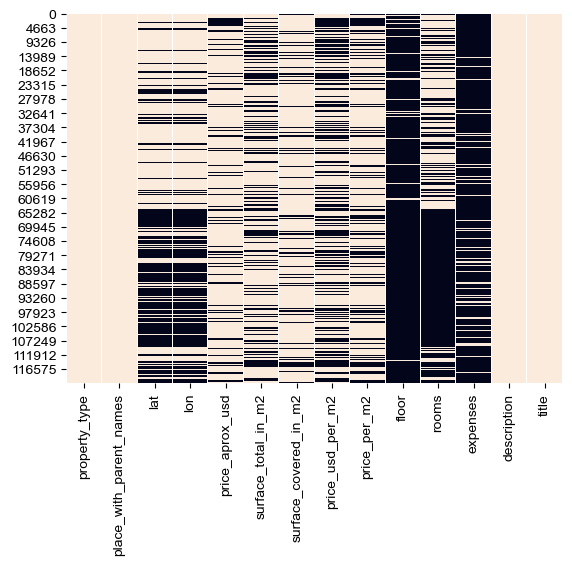

In [27]:
#Utilizamos la herramienta heatmap de la biblioteca seaborn
#Graficos el mapa de calor de los valores no nulos
sns.heatmap(datos.notnull(),cbar=False)
#Seteamos el tamaño de nuestro plot
sns.set(rc={'figure.figsize':(5,14)})

### 1.8 Visualizamos los totales de nulos y no nulos utilizando gráficos de barras.

C:\Users\fpeloso\AppData\Local\Temp\ipykernel_6660\3226666030.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ind, rotation = 90, ha="right")


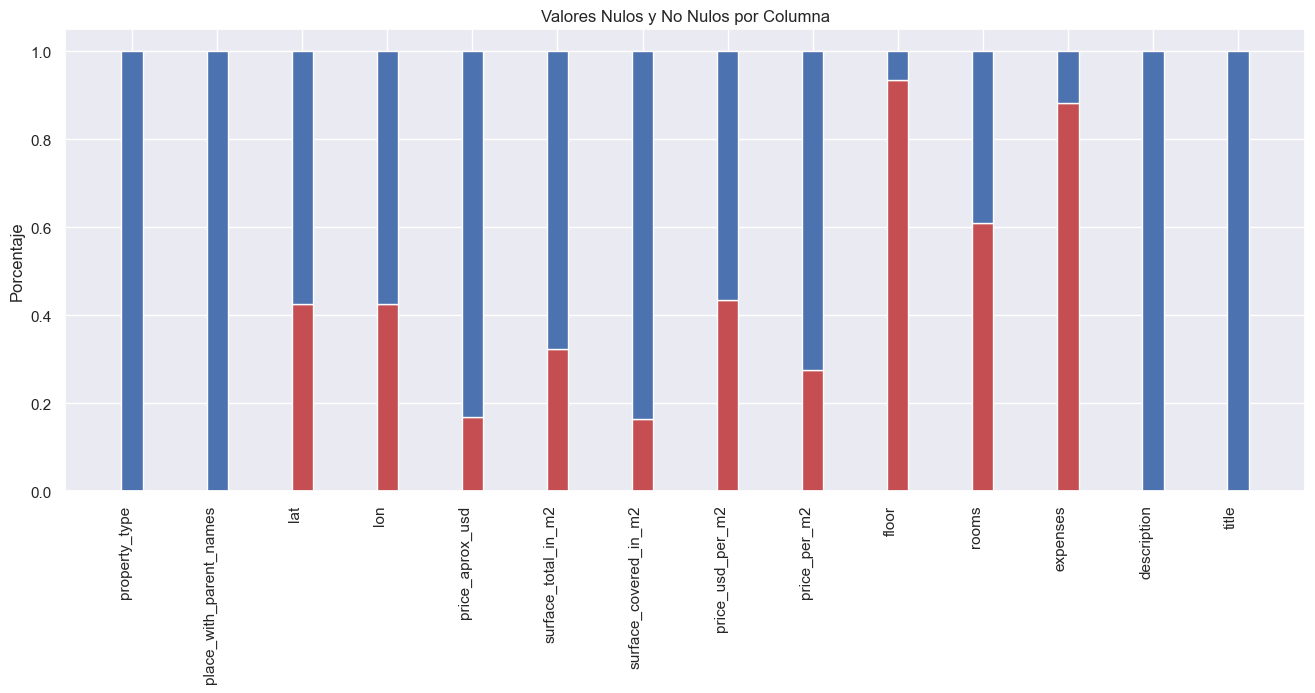

In [28]:
#Definimos un índice usando las columnas del dataset
ind=datos.columns

#Definimos un ancho para las barras
width = 0.25

#Creamos la figura y los ejes. Definimos tamaño de la figura
fig = plt.figure(figsize=(16,6)); ax = plt.axes()

#Graficamos valores nulos con color rojo
ax.bar(ind, valores_nulos, width, color='r') 
#Graficamos valores no nulos con color azul por debajo
ax.bar(ind, valores_no_nulos, width, color='b',bottom=valores_nulos)
 
#Indico etiquetas en eje X e Y
ax.set_ylabel('Porcentaje'); ax.set_title('Valores Nulos y No Nulos por Columna')
 
#Configuramos ticks
ax.tick_params(axis='both', which='minor', labelsize='small')
#Etiquetas de los campos a 90 grados
ax.set_xticklabels(ind, rotation = 90, ha="right")

plt.show()


# 2- Creación de Campos Nuevos

### 2.1 Columna "places_with_parent_names": 
#### Procesamos y extraemos información para crear nuevas columnas de ubicación geográfica 

In [29]:
#Creo un dataframe nuevo separando los campos de la columna places_with_parents
ubicacion = datos["place_with_parent_names"].str.split('|', expand=True) # Separo en varias columnas
#Visualizamos el dataframe creado:
ubicacion

0           1                             2              3  \
0          Argentina               Capital Federal      Mataderos   
1          Argentina        Bs.As. G.B.A. Zona Sur       La Plata   
2          Argentina               Capital Federal      Mataderos   
3          Argentina               Capital Federal        Liniers   
4          Argentina  Buenos Aires Costa Atlántica  Mar del Plata   
...    ..        ...                           ...            ...   
121215     Argentina               Capital Federal       Belgrano   
121216     Argentina      Bs.As. G.B.A. Zona Norte     San Isidro   
121217     Argentina               Capital Federal  Villa Urquiza   
121218     Argentina  Buenos Aires Costa Atlántica  Mar del Plata   
121219     Argentina               Capital Federal                  

                  4     5     6  
0                    None  None  
1                    None  None  
2                    None  None  
3                    None  None  
4            Centro        None  
...             ...   ...   ...  
121215               None  None  
121216       Beccar        None  
121217               None  None  
121218  Plaza Colón        None  
121219         None  None  None  

[121220 rows x 7 columns]

In [30]:
#Vemos cantidad de valores vacios/nulos en cada columna
for i in range(ubicacion.shape[1]):
    print('Porcentaje vacios en columna', i ,' :' ,ubicacion.iloc[:,i].isna().sum()/ubicacion.shape[0])


Porcentaje vacios en columna 0  : 0.0
Porcentaje vacios en columna 1  : 0.0
Porcentaje vacios en columna 2  : 0.0
Porcentaje vacios en columna 3  : 0.0
Porcentaje vacios en columna 4  : 0.03943243689160204
Porcentaje vacios en columna 5  : 0.6663916845405049
Porcentaje vacios en columna 6  : 0.9954792938459001


Columnas a eliminar:
- Columna 0 por ser un índice redundante 
- Columna 1 por tener el dato de País que ya decidimos descartar
- Columna 6 por su alta tasa de registros vacios.

In [31]:
#Creamos un df con las columnas de interes y el nombre de las columnas
ubicacion_limpia=ubicacion.drop([0,1,6],axis=1,inplace=False)
ubicacion_limpia.columns=['provincia','ciudad','barrio','barrio2']
ubicacion_limpia

provincia         ciudad       barrio barrio2
0                    Capital Federal      Mataderos                 None
1             Bs.As. G.B.A. Zona Sur       La Plata                 None
2                    Capital Federal      Mataderos                 None
3                    Capital Federal        Liniers                 None
4       Buenos Aires Costa Atlántica  Mar del Plata       Centro        
...                              ...            ...          ...     ...
121215               Capital Federal       Belgrano                 None
121216      Bs.As. G.B.A. Zona Norte     San Isidro       Beccar        
121217               Capital Federal  Villa Urquiza                 None
121218  Buenos Aires Costa Atlántica  Mar del Plata  Plaza Colón        
121219               Capital Federal                        None    None

[121220 rows x 4 columns]

#### Ahora vamos a imputar los datos de ciudad y barrio
Aquellos registros correspondientes a CABA tiene el campo de ciudad indicando un barrio de Capital Federal.


In [32]:
#Vemos la cantidad de registros nulos en barrio1 antes de imputar
print('La cantidad de registros nulos en barrio antes de imputar son:',ubicacion_limpia['barrio'].isnull().sum())

La cantidad de registros nulos en barrio antes de imputar son: 4780


In [33]:
#Utilizamos un método apply para que en aquellos registros donde la provincia es 'Capital Federal'
#Se guarde dicho valor en el campo 'ciudad' y el valor que estaba almacenado en esa columna, se guarde en barrio1

barrio_limpio=ubicacion_limpia.apply(lambda x: x['ciudad'] if x['provincia'] =='Capital Federal' else x['barrio'],axis=1)

#Visualizamos como quedo
barrio_limpio

0             Mataderos
1                      
2             Mataderos
3               Liniers
4                Centro
              ...      
121215         Belgrano
121216           Beccar
121217    Villa Urquiza
121218      Plaza Colón
121219                 
Length: 121220, dtype: object

Guardo la nueva columna con datos imputados en la columna barrio1 del dataset ubicacion_limpia

In [34]:
ubicacion_limpia['barrio']=barrio_limpio

Chequeamos la cantidad de registros nulos luego de la imputación con los barrios de Capital Federal:

In [35]:
print('La cantidad de registros nulos en barrio despues de imputar son:',ubicacion_limpia['barrio'].isnull().sum())

La cantidad de registros nulos en barrio despues de imputar son: 3483


Ahora imputamos la columna de ciudad, en aquellos registros donde la provincia se define como 'Capital Federal' también se debe definir la ciudad con ese valor

In [36]:
#Creamos un nuevo datafrane para los valores de ciudad que incluyan a capital federal
ciudad_limpia=ubicacion_limpia.apply(lambda x: x['provincia'] if x['provincia'] =='Capital Federal' else x['ciudad'],axis=1)

In [37]:
#añadimos el valor al dataframe ubicacion_limpia
ubicacion_limpia['ciudad']=ciudad_limpia
ubicacion_limpia['ciudad']

0         Capital Federal
1                La Plata
2         Capital Federal
3         Capital Federal
4           Mar del Plata
               ...       
121215    Capital Federal
121216         San Isidro
121217    Capital Federal
121218      Mar del Plata
121219    Capital Federal
Name: ciudad, Length: 121220, dtype: object

#### Ahora analizamos la columna barrio2

In [38]:
#Visualizamos los valores que hay en la columna barrio2
ubicacion_limpia.barrio2.value_counts()

                             39892
Barrio Los Alisos              278
Barrio La Alameda               62
BarrioPortezuelo                54
Barrio Los Lagos                39
Barrio El Golf                  32
Enyoi                           17
Barrio Los Castores             14
QBay Yacht                      13
Barrio La Isla                  10
Barrio Las Glorietas            10
Islas del Canal                  6
Barrio Los Sauces                4
Barrio Barrancas del Lago        4
Barrio Cabos del Lago            3
Barrio El Yacht                  1
Barrio Los Tilos                 1
Name: barrio2, dtype: int64

In [39]:
#Ademas de 40.000 registros vacios, hay mas de 80.000 registros nulos 
ubicacion_limpia.barrio2.isnull().sum()

80780

La columna tiene 40.000 registros vacíos y 80.000 registros nulos.

Vamos a tomar los registros no vacíos/nulos de barrio2 para imputar la columna de barrio1

In [40]:
#Creo una mascara para filtrar los registros vacío y nulos
mascara_barrio2 = ((ubicacion_limpia['barrio2']!='') & (ubicacion_limpia['barrio2'].notnull()))

#Aplicamos el filtro a la columna barrio 2 y vemos cuantos valores quedan
barrio_2_filtrado=ubicacion_limpia['barrio2'].loc[mascara_barrio2]

barrio_2_filtrado.value_counts()

Barrio Los Alisos            278
Barrio La Alameda             62
BarrioPortezuelo              54
Barrio Los Lagos              39
Barrio El Golf                32
Enyoi                         17
Barrio Los Castores           14
QBay Yacht                    13
Barrio Las Glorietas          10
Barrio La Isla                10
Islas del Canal                6
Barrio Los Sauces              4
Barrio Barrancas del Lago      4
Barrio Cabos del Lago          3
Barrio El Yacht                1
Barrio Los Tilos               1
Name: barrio2, dtype: int64

Primero vemos que hay en ciudad y barrio1 en aquellos registros que cuentan con algo en barrio2

In [41]:
#ahora veo que valores hay en barrio 1 cuando tengo algo en barrio2
print(ubicacion_limpia['barrio'].loc[mascara_barrio2].value_counts())

#ahora veo que valores hay en ciudad cuando tengo algo en barrio2
print(ubicacion_limpia['ciudad'].loc[mascara_barrio2].value_counts() )

Nordelta    548
Name: barrio, dtype: int64
Tigre    548
Name: ciudad, dtype: int64


Son todos barrios correspondientes a la ciudad de Tigre en la zona de Nordelta

Imputamos los valores faltantes de la columna barrio1 con aquellos presentes en barrio2

In [42]:
#Utilizo la mascara de barrio2 y guardo los valores que tenía filtrados
ubicacion_limpia.barrio.loc[mascara_barrio2]=barrio_2_filtrado

Corroboramos los valores que se imputaron en barrio

In [43]:
ubicacion_limpia.barrio.value_counts()

                                 47499
Palermo                           4083
Nordelta                          3315
Belgrano                          2992
Caballito                         2273
                                 ...  
Carmen de Patagones                  1
Barrio Cerrado "La Escondida"        1
Haras del Sur II                     1
Rancagua                             1
Barrio Cerrado "SpringDale"          1
Name: barrio, Length: 634, dtype: int64

Damos de baja la columba barrio2, habiendo ya extraido toda la información que contenía

In [44]:
#Damos de baja la columna barrio2
ubicacion_limpia.drop('barrio2',axis=1, inplace=True)
ubicacion_limpia.sample(20)

provincia           ciudad                barrio
2000    Bs.As. G.B.A. Zona Norte            Tigre              Nordelta
79548   Bs.As. G.B.A. Zona Norte            Pilar                 Pilar
26081                   Santa Fe          Rosario                      
71409     Bs.As. G.B.A. Zona Sur  Lomas de Zamora              Banfield
28410   Bs.As. G.B.A. Zona Norte       San Isidro                      
27835   Bs.As. G.B.A. Zona Norte       San Isidro              Acassuso
100754           Capital Federal  Capital Federal          Barrio Norte
109828           Capital Federal  Capital Federal          Barrio Norte
1908    Bs.As. G.B.A. Zona Norte            Tigre                      
112778           Capital Federal  Capital Federal      Villa del Parque
98435            Capital Federal  Capital Federal            Villa Luro
72000     Bs.As. G.B.A. Zona Sur  Lomas de Zamora             Temperley
73259            Capital Federal  Capital Federal          Villa Devoto
46487   Bs.As. G.B.A. Zona Norte     San Fernando              Victoria
91174                 Corrientes        Ituzaingó                      
36511     Bs.As. G.B.A. Zona Sur            Lanús  Remedios de Escalada
99217     Bs.As. G.B.A. Zona Sur            Lanús                 Lanús
68357   Bs.As. G.B.A. Zona Norte       San Isidro                      
79145     Bs.As. G.B.A. Zona Sur            Lanús                 Lanús
63636            Capital Federal  Capital Federal            Tribunales

#### Incorporamos los datos geográficos a nuestro dataset

In [45]:
#aca pruebo sumar las nuevas columnas a nuestro datos
datos[['provincia','ciudad','barrio']]=ubicacion_limpia

#### Damos de baja la columna 'place_with_parent_names'

In [46]:
#ahora hacemos drop de la columna place_with_parent_names, ya que ya extraímos su información
datos.drop('place_with_parent_names',axis=1, inplace=True)
datos.sample(3)


property_type        lat        lon  price_aprox_usd  \
88463     apartment        NaN        NaN         165000.0   
57534         house -34.922745 -57.970583              NaN   
90186     apartment        NaN        NaN         225000.0   

       surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
88463                  NaN                   95.0               NaN   
57534                  NaN                    NaN               NaN   
90186                  NaN                   81.0               NaN   

       price_per_m2  floor  rooms  expenses  \
88463   1736.842105    NaN    NaN    1200.0   
57534           NaN    NaN    8.0       NaN   
90186   2777.777778    NaN    NaN       NaN   

                                             description  \
88463  OPORTUNIDAD! DEPARTAMENTO 4 DORMITORIOS EN NUE...   
57534  Corredor Responsable: Fabiana Di Girolamo - CD...   
90186   Muy buen departamento 3 ambientes a estrenar....   

                                                   title  \
88463                       Departamento - Nueva Cordoba   
57534  Dg. 73 y 43 Casa de 3 dormitorios, garage y patio   
90186                             Departamento en Olivos   

                      provincia         ciudad    barrio  
88463                   Córdoba                     None  
57534    Bs.As. G.B.A. Zona Sur       La Plata  La Plata  
90186  Bs.As. G.B.A. Zona Norte  Vicente López    Olivos

#### Luego de haber agregado campos nuevos, volvemos a reivsar la calidad de las columnas

C:\Users\fpeloso\AppData\Local\Temp\ipykernel_6660\1542299704.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ind, rotation = 90, ha="right")


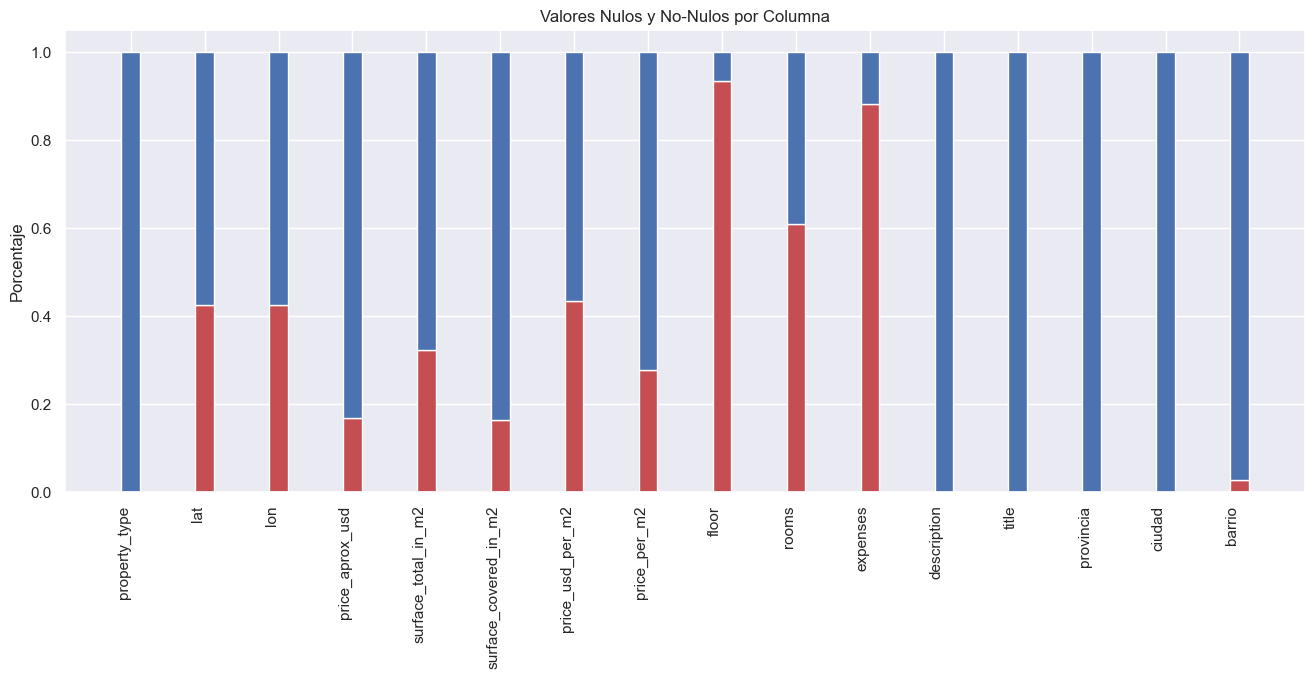

In [47]:
#Defino el indice segun las columnas
ind=datos.columns

#Calculo nuevamente los valores nulos y nulos en cada columna
valores_nulos=datos.isnull().sum()/datos.shape[0]
valores_no_nulos=datos.notnull().sum()/datos.shape[0]

#ancho de las barras
width = 0.25

fig = plt.figure(figsize=(16,6)); ax = plt.axes()

#grafico valores nulos con color rojo
ax.bar(ind, valores_nulos, width, color='r')  
#grafico valores no nulos con color azul por debajo
ax.bar(ind, valores_no_nulos, width, color='b',bottom=valores_nulos)

#Configuro labels de ejes
ax.set_ylabel('Porcentaje'); ax.set_title('Valores Nulos y No-Nulos por Columna')

#Configuramos ticks y ticklabels
ax.tick_params(axis='both', which='minor', labelsize='small')
ax.set_xticklabels(ind, rotation = 90, ha="right")

plt.show()

### 2.2 Columna "description":
#### Utilizamos métodos de regex para extraer información de este campo 

En cada caso se crea una nueve serie donde se almacena el texto del campo "description".

Sobre esta nueva serie se hace un apply para ejecutar el patron de regex correspondiente en cada caso.

#### Análisis de Campo Ambiente

In [48]:
# Guardo el texto en una nueva serie
SerieAmbiente = datos['description']
#Defino el patrón a buscar
patron_amb = '\d\s+[Aa]mbiente'
#Instancio el compile de regex con dicho patrón
patron_regex_amb = re.compile(patron_amb)

#Creo una nueva serie aplicando el patron de regex 
Ambiente = SerieAmbiente.apply(lambda x: np.NaN if len(patron_regex_amb.findall(str(x)))==0
                               else (patron_regex_amb.findall(str(x))[0])[0])
#Guardo la serie nueva en una columna de nuestro dataset
datos['ambientes'] = Ambiente

Revisamos la cantidad de no nulos en nuestra nueva columna:

In [49]:
print('La cantidad de  registros no nulos en ambientes es:', datos['ambientes'].notnull().sum())

La cantidad de  registros no nulos en ambientes es: 22328


Revisamos en cuales registros la columna 'rooms' no cuenta con datos y puede ser imputada por la columna 'ambientes':

In [50]:
#Creo una mascara donde 'ambientes' es no nulo y 'rooms' es nulo
mask_amb=datos['ambientes'].notnull() & datos['rooms'].isnull() 

In [51]:
#Contamos la cantidad de casos que devuelva la máscara
print('Se pueden imputar', mask_amb.sum(),' registros de "rooms" con "ambientes"')


Se pueden imputar 11559  registros de "rooms" con "ambientes"


In [52]:
datos['rooms'].notnull().sum()

47390

In [53]:
#Pasamos ambientes a float
datos['ambientes' ] = datos['ambientes'].astype(float)

# asignamos ambientes a rooms cuando ambientes es no-nulo y rooms es nulo
datos['rooms'] = datos.apply(lambda x: x['rooms'] if x['rooms'] > 0 else x['ambientes'], axis=1)

#Corroboramos cantidad de no nulos ahora
datos['rooms'].notnull().sum()

58949

#### Campo Cochera

In [54]:
SerieCoch = datos['description']
patron_coch = '([Cc]ochera|[Gg]arage)'
patron_regex_coch = re.compile(patron_coch)
Cochera = SerieCoch.apply(lambda x: False if len(patron_regex_coch.findall(str(x)))==0 else True)
datos['cochera'] = Cochera

#### Campo Parrilla

In [55]:
SerieParrilla = datos['description']
patron_parrilla = '[Pp]arrilla'
patron_regex_parrilla = re.compile(patron_parrilla)
Parrilla = SerieParrilla.apply(lambda x: False if len(patron_regex_parrilla.findall(str(x)))==0 else True)
datos['parrilla'] = Parrilla

#### Campo Patio

In [56]:
SeriePatio = datos['description']
patron_patio = '[Pp]atio'
patron_regex_patio = re.compile(patron_patio)
Patio = SeriePatio.apply(lambda x: False if len(patron_regex_patio.findall(str(x)))==0 else True)
datos['patio'] = Patio

#### Campo Pileta

In [57]:
SeriePileta = datos['description']
patron_pileta = '([Pp]ileta|[Pp]iscina)'
patron_regex_pileta = re.compile(patron_pileta)
Pileta = SeriePileta.apply(lambda x: False if len(patron_regex_pileta.findall(str(x)))==0 else True)
datos['pileta'] = Pileta

#### Campo Vista

In [58]:
SerieVista = datos['description']
patron_vista = '([Aa]l\s[Ff]rente|[\s.,!/][Vv]istas*[\s.,!/)])'
patron_regex_vista = re.compile(patron_vista)
Vista = SerieVista.apply(lambda x: False if len(patron_regex_vista.findall(str(x)))==0 else True)
datos['vista'] = Vista

# DEJAMOS COMENTAODOS LOS BLOQUES DONDE SE IMPUTA 'price_usd_per_m2'


# 3 - Imputación de Campos

### 3.1 Columna price_usd_per_m2:
#### Vamos a tratar de imputar valores en esta columna

Cuando el valor de precio por metro cuadrado es nulo, se debe a que uno de los valores de superficie total y/o
precio en dólares es nulo.

Por lo tanto no se pueden utilizar esos campos para imputar la columna que nos interesa

In [59]:
# Creo un dataframe donde tengo los registro nulos de precio por metro cuadrado
# datos_usdm2_null = datos[datos['price_usd_per_m2'].isnull()]

#### Definimos limites superiores e inferiores para outliers de precios y superficies

In [59]:
#defino limites de precio por metro cuadrado
lim_inf_precio_m2=500
lim_sup_precio_m2=6000

#defino limites de superficie
lim_inf_surface=10
lim_sup_surface=2000

#defino limites de precio
lim_sup_precio=500000

### Comentamos el bloque de abajo para no imputar la columna price_usd_per_m2'

### Comentamos el bloque de abajo para no imputar la columna price_usd_per_m2'

#### Desde acá analizamos el nuevo campo usd_per_m2_2 que complementa a price_usd_per_m2

In [61]:
#Creo una mascara donde 'price_usd_per_m2' es nulo y mi nueva columna no lo es
#mask_imputar = datos['price_usd_per_m2'].isnull() & datos['usd_per_m2_2'].notnull()

#print(f'el campo price_usd_per_m2 cuenta con {datos.price_usd_per_m2.count()} datos no nulos')
#print(f'el campo usd_per_m2_2  aporta {datos[mask_imputar].usd_per_m2_2.count()} valores no nulos al campo price_usd_per_m2')


In [62]:
# datos.price_usd_per_m2.notnull().sum()

Vemos cuantas propiedades quedan por fuera de mis limites de outliers

In [60]:
#Mascara Inferior
mask_inf = datos.price_usd_per_m2 < lim_inf_precio_m2
print(f'En todo el país hay {datos[mask_inf].price_usd_per_m2.count()} propiedades de menos de ', lim_inf_precio_m2, 'usd x m2')

#Mascara Superior
mask_sup = datos.price_usd_per_m2 > lim_sup_precio_m2
print(f'En todo el país hay {datos[mask_sup].price_usd_per_m2.count()} propiedades de más de ', lim_sup_precio_m2,' usd x m2')

En todo el país hay 5335 propiedades de menos de  500 usd x m2
En todo el país hay 1489 propiedades de más de  6000  usd x m2


Visualizamos el top 7 de propiedades que son consideradas outliers, mostrando sus datos geográficos:

In [61]:
#Creo la mascara donde incluyo mis outliers
mask_outliers = (datos.price_usd_per_m2 < lim_inf_precio_m2) | (datos.price_usd_per_m2 > lim_sup_precio_m2)

#Agrupo por  los campos geográficos y cuento la cantidad de precios publicados
datos_outliers_usd = datos[mask_outliers].groupby(['provincia', 'ciudad', 'barrio', 'property_type']).agg({'price_usd_per_m2': 'count'})

#Los ordeno de mayor a menor y veo los primeros 7
datos_outliers_usd.sort_values('price_usd_per_m2', ascending=False).head(7)

price_usd_per_m2
provincia                    ciudad           barrio        property_type                  
Capital Federal              Capital Federal  Boedo         apartment                   403
Buenos Aires Costa Atlántica Mar del Plata                  house                       368
Bs.As. G.B.A. Zona Norte     Tigre            Benavidez     house                       264
Capital Federal              Capital Federal  Puerto Madero apartment                   218
                                              San Cristobal apartment                   193
Bs.As. G.B.A. Zona Norte     Pilar                          house                       177
Córdoba                      Villa Carlos Paz               house                       151

#### Ahora analizamos cada caso en particular

#### Caso Barrio de Boedo:

In [62]:
# Capital Federal | Capital Federal | Boedo | apartment con price_usd_per_m2 
# en el 100% de los cosas corresponden a proyectos desde el pozo 
# en casi todos los casos price_usd_per_m2 = price_per_m2 pero no guardan relación ni en $ ni en usd con 'description'
# vemos cuantos quedan entre 500 y 6000 usd en la misma zona paraa el mismo property_type
maskboedo = (datos.price_usd_per_m2 > lim_inf_precio_m2) & (datos.price_usd_per_m2 < lim_sup_precio_m2) &\
             (datos.provincia == 'Capital Federal') & (datos.ciudad == 'Capital Federal') &\
             (datos.barrio == 'Boedo') & (datos.property_type == 'apartment')
datos[maskboedo].price_usd_per_m2.count() # quedan 357 en el dataset con las mismas características

324

In [63]:
# eliminamos entonces los 403 que no son consistentes
maskboedodrop = ((datos.price_usd_per_m2 < lim_inf_precio_m2) | (datos.price_usd_per_m2 > lim_sup_precio_m2)) &\
             (datos.provincia == 'Capital Federal') & (datos.ciudad == 'Capital Federal') &\
             (datos.barrio == 'Boedo') & (datos.property_type == 'apartment')
listboedodrop = datos[maskboedodrop].index
datos = datos.drop(listboedodrop, axis=0)

#### Caso Mar del Plata:

In [64]:
# Buenos Aires Costa Atlántica | Mar del Plata |  | house con price_usd_per_m2 < 500 y mayor a 6000
# todos con precios en usd x m2 debajo de 500 - pudimos chequear con el campo description valores correctos de 309, 450 y 442
# maskMardel = (datos.index==9529)
# datos[maskMardel][['price_usd_per_m2', 'surface_total_in_m2']]
# eliminamos sólo los que tienen price_usd_per_m2 < 300 - 186 registros
maskMardel = (datos.price_usd_per_m2 < 300) &\
             (datos.provincia == 'Buenos Aires Costa Atlántica') & (datos.ciudad == 'Mar del Plata') &\
             (datos.property_type == 'house')
listMardeldrop = datos[maskMardel].index
datos = datos.drop(listMardeldrop, axis=0)

#### Caso San Cristobal:

In [65]:
# Capital Federal | Capital Federal | San Cristobal | apartment con price_usd_per_m2 < 500 y mayor a 6000
# en el 100% de los cosas corresponden a proyectos desde el pozo 
# en casi todos los casos price_usd_per_m2 = price_per_m2 pero no guardan relación ni en $ ni en usd con 'description'
# vemos cuantos quedan entre 500 y 6000 usd en la misma zona paraa el mismo property_type
maskSanCrist = (datos.price_usd_per_m2 > lim_inf_precio_m2) & (datos.price_usd_per_m2 < lim_sup_precio_m2) &\
             (datos.provincia == 'Capital Federal') & (datos.ciudad == 'Capital Federal') &\
             (datos.barrio == 'San Cristobal') & (datos.property_type == 'apartment')
datos[maskSanCrist].price_usd_per_m2.count() # quedan 293 en el dataset con las mismas características

211

In [66]:
# eliminamos entonces los 193 que no son consistentes
maskSanCristdrop = ((datos.price_usd_per_m2 < lim_inf_precio_m2) | (datos.price_usd_per_m2 > lim_sup_precio_m2)) &\
             (datos.provincia == 'Capital Federal') & (datos.ciudad == 'Capital Federal') &\
             (datos.barrio == 'San Cristobal') & (datos.property_type == 'apartment')
listSanCristdrop = datos[maskSanCristdrop].index
datos = datos.drop(listSanCristdrop, axis=0)

#### Caso Pilar:

In [67]:
# BsAs. G.B.A. Zona Norte | Pilar | | house con price_usd_per_m2 < 500 y mayor a 6000
# las que están x debajo de 500 usd x m2 son todas reales muy afectadas por la superficie descubierta
# arriba de 6000 hay 3 que dropeamos
maskPilardrop = (datos.price_usd_per_m2 > lim_sup_precio_m2) &\
             (datos.provincia == 'Bs.As. G.B.A. Zona Norte') & (datos.ciudad == 'Pilar') &\
             (datos.property_type == 'house')
listPilardrop = datos[maskPilardrop].index
datos = datos.drop(listPilardrop, axis=0)

#### Caso Villa Carlos Paz:

In [68]:
# Córdoba | Villa Carlos Paz | | house con price_usd_per_m2 < 500 y mayor a 6000
# todas debajo de 500 usd x m2 y verificado valores de 100 a 200
# dropeamos sólo debajo de 100 usd x m2 porque parecen casas muy destruídas
maskCarlosdrop = (datos.price_usd_per_m2 < 100) &\
                 (datos.provincia == 'Córdoba') & (datos.ciudad == 'Villa Carlos Paz') &\
                 (datos.property_type == 'house')
listCarlosDrop = datos[maskCarlosdrop].index
datos = datos.drop(listCarlosDrop, axis=0)

#### Caso Pinamar:

In [69]:
# Buenos Aires Costa Atlántica | Pinamar | | house con price_usd_per_m2 < 500 y mayor a 6000
# Son todas debajo de 500 usd y pudimos verificar rangos de 200 a 500
# dropeamos debajo de 200
maskPinadrop = (datos.price_usd_per_m2 < 200) &\
                 (datos.provincia == 'Buenos Aires Costa Atlántica') & (datos.ciudad == 'Pinamar') &\
                 (datos.property_type == 'house')
listPinaDrop = datos[maskPinadrop].index
datos = datos.drop(listPinaDrop, axis=0)

#### Caso Rosario:

In [70]:
# Santa Fe | Rosario | | department con price_usd_per_m2 < 500 y mayor a 6000
# todos los vimos como errores < 500 no valida ninguno con 'description' > 6000 son emprendimientos desde el pozo y tampoco valida
maskRosario = (datos.price_usd_per_m2 > lim_inf_precio_m2) & (datos.price_usd_per_m2 < lim_sup_precio_m2) &\
             (datos.provincia == 'Santa Fe') & (datos.ciudad == 'Rosario') &\
             (datos.property_type == 'apartment')
datos[maskRosario].price_usd_per_m2.count() # quedan 3300 en el dataset con las mismas características

3039

In [71]:
# eliminamos entonces los 119 que no son consistentes
maskRosariodrop = ((datos.price_usd_per_m2 < lim_inf_precio_m2) | (datos.price_usd_per_m2 > lim_sup_precio_m2)) &\
             (datos.provincia == 'Santa Fe') & (datos.ciudad == 'Rosario') &\
             (datos.property_type == 'apartment')
listRosariodrop = datos[maskRosariodrop].index
datos = datos.drop(listRosariodrop, axis=0)

#### ahora vamos a tomar los outliers para eliminar tal queno estén en ninguna de las segmentaciones anteriores 
- para casas <200 y >6000
- para apartments <500 y >6000
- vemos para stores y phs a ver su distribución

In [72]:
maskRestoapartments =  ((datos.price_usd_per_m2 < lim_inf_precio_m2) | (datos.price_usd_per_m2 > lim_sup_precio_m2)) &\
                        (datos.property_type == 'apartment') &\
                        (datos.barrio != 'Boedo') & (datos.barrio != 'Puerto Madero') & (datos.barrio != 'San Cristobal') &\
                        (datos.ciudad != 'Rosario')
datos[maskRestoapartments].groupby(['provincia', 'ciudad', 'barrio']).aggregate({'price_usd_per_m2': 'count'})\
                            .sort_values(by='price_usd_per_m2', ascending=False)

price_usd_per_m2
provincia                    ciudad             barrio                          
Capital Federal              Capital Federal    Palermo                       91
                                                Belgrano                      39
Buenos Aires Costa Atlántica Miramar                                          32
Capital Federal              Capital Federal    Nuñez                         30
                                                                              26
...                                                                          ...
Bs.As. G.B.A. Zona Sur       La Plata                                          1
                             Ezeiza                                            1
                             Esteban Echeverría Canning                        1
                             Avellaneda         Villa Dominico                 1
Tucumán                      Yerba Buena                                       1

[136 rows x 1 columns]

In [73]:
listaRestoApartments = datos[maskRestoapartments].index
datos = datos.drop(listaRestoApartments, axis=0)

In [74]:
maskRestohouse =  ((datos.price_usd_per_m2 < 200) | (datos.price_usd_per_m2 > 6000)) &\
                        (datos.property_type == 'house') &\
                        (datos.ciudad != 'Mar del Plata') & (datos.ciudad != 'Pilar') & (datos.ciudad != 'Villa Carlos Paz') &\
                        (datos.ciudad != 'Pinamar') & (datos.barrio != 'Benavidez')
datos[maskRestohouse].groupby(['provincia', 'ciudad', 'barrio']).aggregate({'price_usd_per_m2': 'count'})\
                            .sort_values(by='price_usd_per_m2', ascending=False)

price_usd_per_m2
provincia                    ciudad          barrio                               
Córdoba                      Punilla                                            32
Bs.As. G.B.A. Zona Oeste     Moreno                                             29
Misiones                     Posadas                                            24
Bs.As. G.B.A. Zona Norte     Tigre                                              23
Buenos Aires Interior        Luján                                              23
...                                                                            ...
Bs.As. G.B.A. Zona Norte     Tigre           Ricardo Rojas                       1
Buenos Aires Costa Atlántica Cariló                                              1
Capital Federal              Capital Federal Belgrano                            1
                                             Almagro                             1
Bs.As. G.B.A. Zona Oeste     Moreno          St. Patrick Country                 1

[273 rows x 1 columns]

In [75]:
listaRestoHouse = datos[maskRestohouse].index
datos = datos.drop(listaRestoHouse, axis=0)

In [76]:
datos = datos.drop('price_per_m2', axis=1)

In [77]:
datos = datos.drop('ambientes', axis=1)

In [81]:
#datos = datos.drop('usd_per_m2_2', axis=1)

## 4- Visualización de Variables de Interés
### 4.1 Distribución de 'price_aprox_usd' y 'price_usd_per_m2':


<AxesSubplot:xlabel='price_usd_per_m2', ylabel='Count'>

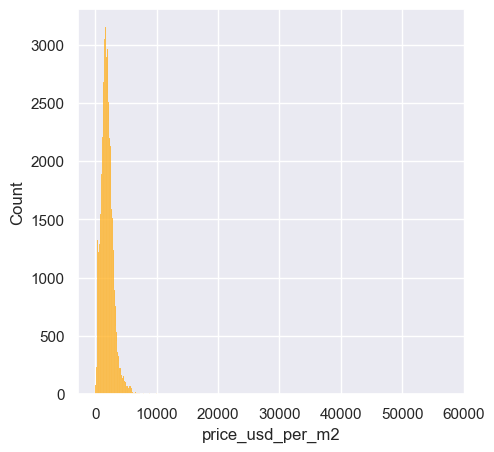

In [82]:
#Graficamos un histograma de precio por metro cuadrado
sns.set(rc={'figure.figsize':(5,5)})
sns.histplot(datos['price_usd_per_m2'], color = "orange",binwidth=100)

Si no se setea un limite en el eje X , no se puede visualizar la distribución debido a la presencia de outliers

Establecemos un limite de 10.000 en el eje X para poder ver la distribución mejor.

[(0.0, 10000.0)]

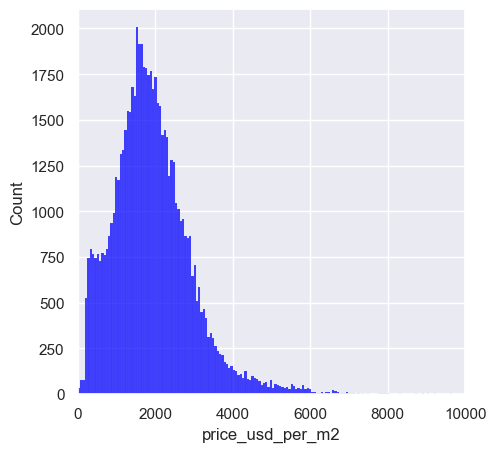

In [83]:
#Graficamos el histograma nuevamente
g2= sns.histplot(datos.price_usd_per_m2, color='blue')

#Limite de 10.000 al eje X
g2.set(xlim=(0,10000))

#### Visualizamos usando KDE

<AxesSubplot:xlabel='price_usd_per_m2', ylabel='Density'>

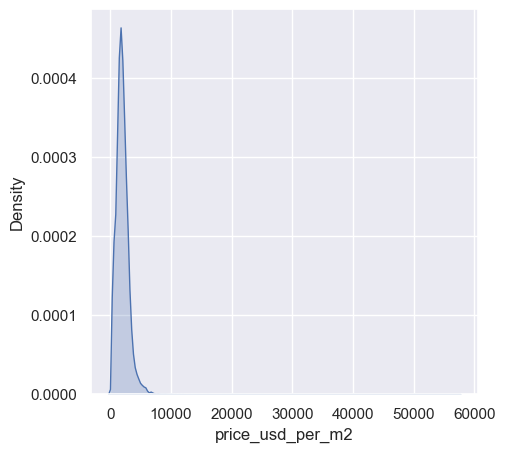

In [84]:
sns.kdeplot(datos.price_usd_per_m2, shade=True)

[(0.0, 10000.0)]

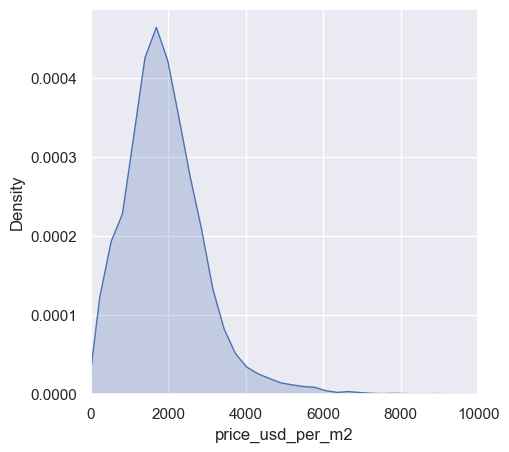

In [85]:
gkde=sns.kdeplot(datos.price_usd_per_m2, shade=True)
gkde.set(xlim=(0,10000))

Visualizamos la distribución de precio por metro cuadrado mediante un boxplot

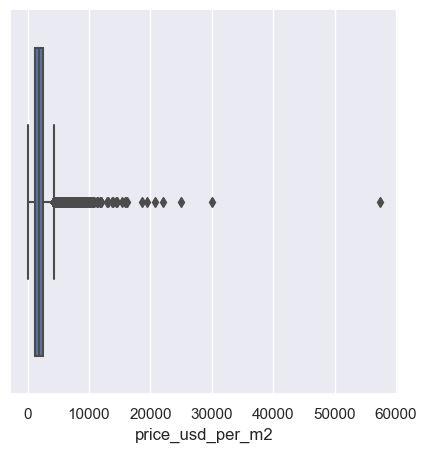

In [86]:
gbox_precio=sns.boxplot(x=datos.price_usd_per_m2)
gbox_precio=sns.set(rc={'figure.figsize':(6,6)})

Limitamos nuevamente el Eje X a 10.000 para mejor visualización

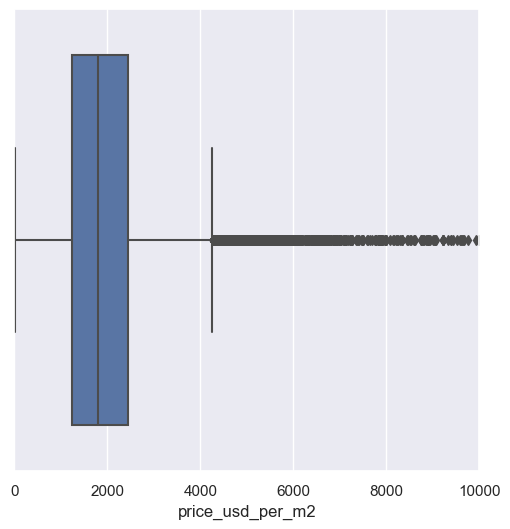

In [87]:
gbox_precio_filtrado=sns.boxplot(x=datos.price_usd_per_m2)
gbox_precio_filtrado.set(xlim=(0,10000))
gbox_precio_filtrado=sns.set(rc={'figure.figsize':(6,6)})

### 4.2 Estadísticas de Precio por Ubicación Geográfica

Filtramos las propiedades que no pertencen a CABA.
Agrupamos las propiedades segun provincia, ciudad y tipo de propiedad.
Visualizamos la media, desvio standard y cantidad de registros para cada grupo

Vamos el top 15 según cantidad de propiedades

In [88]:
masknoCap = datos['provincia'] != 'Capital Federal'
datos_agrup =datos[masknoCap].groupby(['provincia', 'ciudad', 'property_type']).agg({'price_usd_per_m2': ['mean', 'std', 'count'] })

datos_agrup.sort_values(('price_usd_per_m2', 'count'), ascending=False).round(0).head(15)


price_usd_per_m2  \
                                                                       mean   
provincia                    ciudad          property_type                    
Buenos Aires Costa Atlántica Mar del Plata   apartment               1987.0   
Bs.As. G.B.A. Zona Norte     Tigre           house                   1476.0   
Santa Fe                     Rosario         apartment               1718.0   
Bs.As. G.B.A. Zona Norte     Tigre           apartment               2377.0   
                             Pilar           house                   1189.0   
                             Vicente López   apartment               3064.0   
Córdoba                      Córdoba         apartment               1312.0   
Bs.As. G.B.A. Zona Norte     Escobar         house                   1067.0   
                             San Isidro      house                   1416.0   
Córdoba                                      apartment               1596.0   
Bs.As. G.B.A. Zona Norte     San Isidro      apartment               2812.0   
Bs.As. G.B.A. Zona Sur       Lomas de Zamora apartment               2008.0   
Buenos Aires Costa Atlántica Mar del Plata   house                    837.0   
Bs.As. G.B.A. Zona Norte     Pilar           apartment               1853.0   
                             Vicente López   house                   1565.0   

                                                                         
                                                              std count  
provincia                    ciudad          property_type               
Buenos Aires Costa Atlántica Mar del Plata   apartment      539.0  3466  
Bs.As. G.B.A. Zona Norte     Tigre           house          776.0  3371  
Santa Fe                     Rosario         apartment      454.0  3040  
Bs.As. G.B.A. Zona Norte     Tigre           apartment      643.0  2914  
                             Pilar           house          643.0  1504  
                             Vicente López   apartment      849.0  1363  
Córdoba                      Córdoba         apartment      403.0  1205  
Bs.As. G.B.A. Zona Norte     Escobar         house          551.0  1011  
                             San Isidro      house          623.0   976  
Córdoba                                      apartment      348.0   939  
Bs.As. G.B.A. Zona Norte     San Isidro      apartment      736.0   888  
Bs.As. G.B.A. Zona Sur       Lomas de Zamora apartment      507.0   815  
Buenos Aires Costa Atlántica Mar del Plata   house          425.0   788  
Bs.As. G.B.A. Zona Norte     Pilar           apartment      737.0   746  
                             Vicente López   house          598.0   733

Filtramos los barrios de CABA.
Agrupamos las propiedades segun barrio y tipo de propiedad.
Visualizamos la media, desvio standard y cantidad de registros para cada grupo

Vamos el top 15 según cantidad de propiedades

In [89]:
maskCap = datos['provincia'] == 'Capital Federal'
datos_agrup =datos[maskCap].groupby(['ciudad', 'barrio', 'property_type']).agg({'price_usd_per_m2': ['mean', 'std', 'count']})
datos_agrup.sort_values(('price_usd_per_m2', 'count'), ascending=False).round(0).head(15)

price_usd_per_m2              
                                                        mean     std count
ciudad          barrio        property_type                               
Capital Federal Palermo       apartment               3272.0   891.0  2577
                Belgrano      apartment               3108.0   764.0  1935
                Caballito     apartment               2473.0   479.0  1550
                Recoleta      apartment               3253.0   845.0  1090
                Villa Urquiza apartment               2540.0   423.0   970
                San Telmo     apartment               2375.0   568.0   918
                Villa Crespo  apartment               2548.0   503.0   873
                Flores        apartment               2083.0   389.0   839
                Barrio Norte  apartment               3005.0   863.0   819
                Almagro       apartment               2248.0   502.0   706
                Puerto Madero apartment               6065.0  1374.0   479
                Nuñez         apartment               3060.0   860.0   458
                Balvanera     apartment               1955.0   481.0   415
                              house                    889.0   501.0   395
                Saavedra      apartment               2399.0   445.0   337

#### Precio por m2 Promedio por Provincia

Vemos como varía el precio promedio según cada provincia

In [90]:
# Creamos un nuevo dataframe con los columnas de precio y provincia
precio_por_provincia=datos[['price_usd_per_m2','provincia']]

#Las agrupamos y usamos la función de agregación de la media
precio_medio_por_provincia=precio_por_provincia.groupby('provincia').mean().round(0).sort_values(by='price_usd_per_m2',ascending=False)
print("Vemos el precio promedio por provincia ordenado de mayor a menor:")
display(precio_medio_por_provincia)


Vemos el precio promedio por provincia ordenado de mayor a menor:


price_usd_per_m2
provincia                                     
San Juan                                3191.0
Capital Federal                         2583.0
Río Negro                               1882.0
Bs.As. G.B.A. Zona Norte                1787.0
Neuquén                                 1774.0
Buenos Aires Costa Atlántica            1627.0
Santa Fe                                1609.0
Chubut                                  1543.0
Corrientes                              1527.0
Bs.As. G.B.A. Zona Sur                  1517.0
Formosa                                 1510.0
Mendoza                                 1395.0
Bs.As. G.B.A. Zona Oeste                1317.0
Córdoba                                 1265.0
Tierra Del Fuego                        1197.0
Salta                                   1142.0
Entre Ríos                              1109.0
Buenos Aires Interior                   1102.0
San Luis                                1075.0
Chaco                                    969.0
Tucumán                                  941.0
Misiones                                 919.0
La Pampa                                 899.0
Santa Cruz                               697.0
Catamarca                                638.0
Jujuy                                    617.0
Santiago Del Estero                      369.0
La Rioja                                 243.0

#### Ahora visualizamos la distribución en cada provincia usando boxplots 


Primero con los datos sin filtrar:

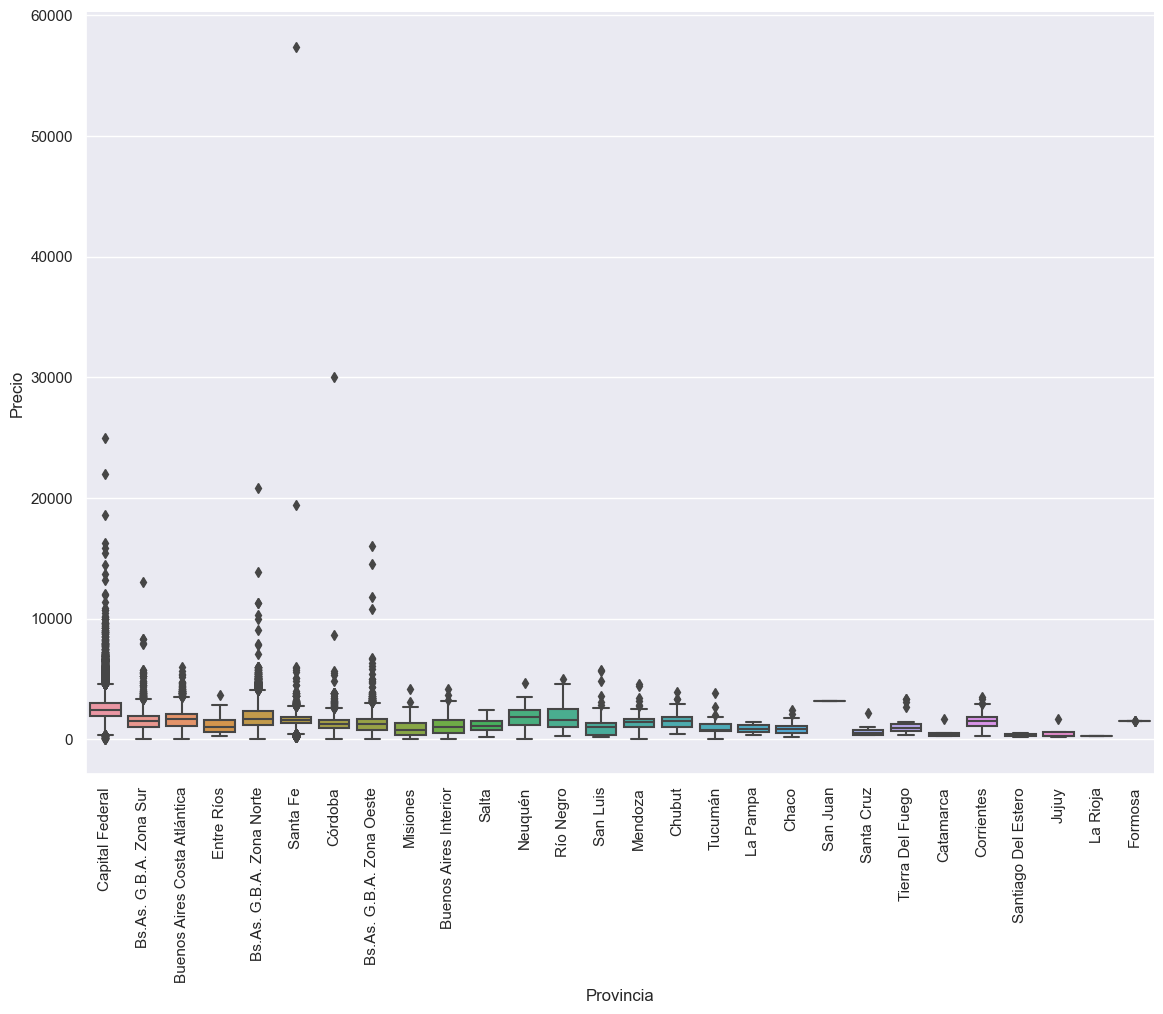

In [91]:
#Graficamos boxplot de cada provincia
g_box_prov = sns.catplot(x = "provincia", y = "price_usd_per_m2", data=precio_por_provincia, kind="box",height=8.27, aspect=11.7/8.27)
g_box_prov.set_axis_labels("Provincia", "Precio")  
g_box_prov.set_xticklabels(rotation=90) 

Ahora filtramos los precios por m2 menores a 10.000

In [92]:
#Creo un dataframe con los precio filtrados
precio_provincia_filtrado=precio_por_provincia.loc[precio_por_provincia['price_usd_per_m2']<lim_sup_precio_m2]

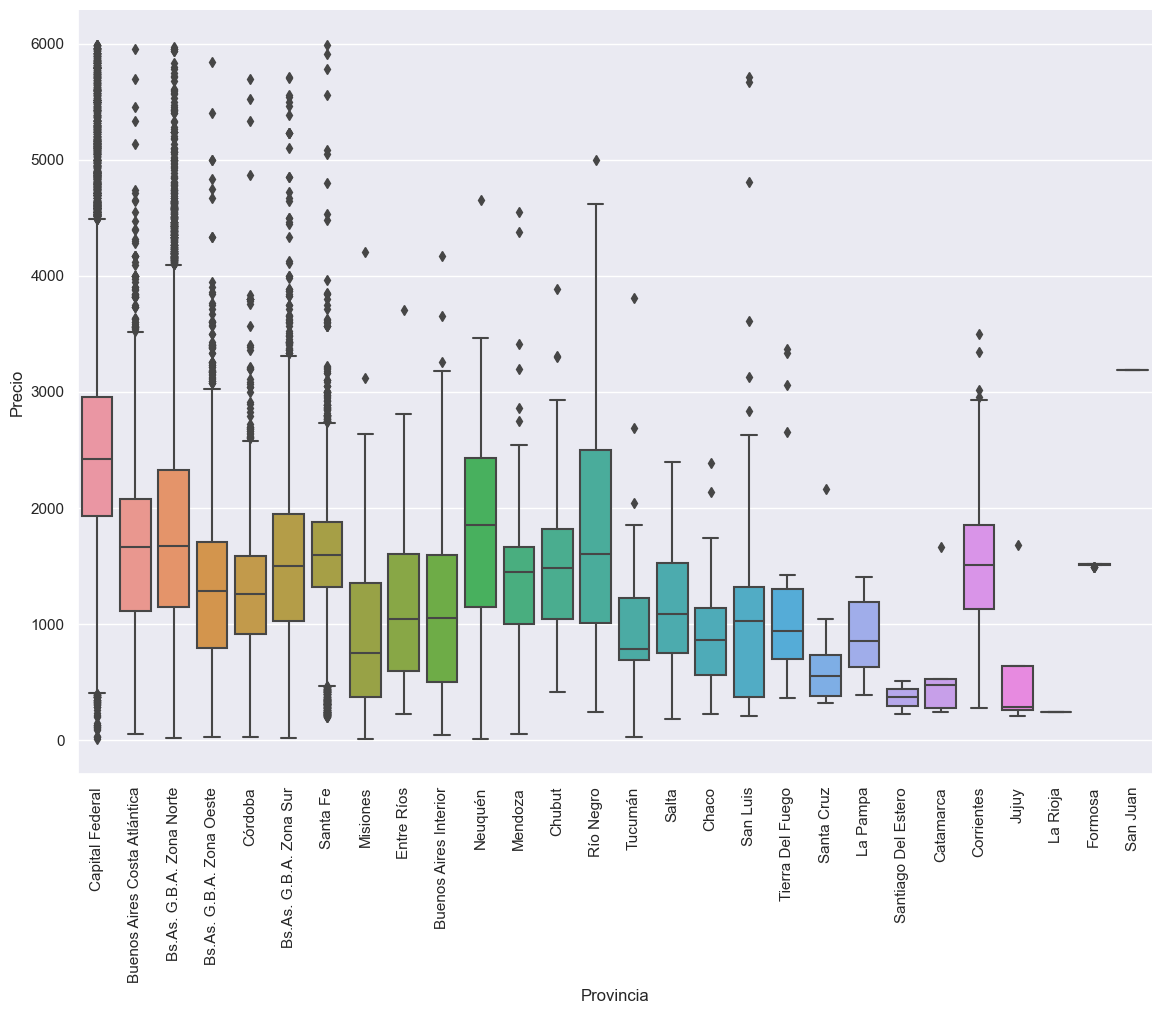

In [93]:
#Graficamos boxplot de cada provincia
g_box_prov_filtrada = sns.catplot(x = "provincia", y = "price_usd_per_m2", data=precio_provincia_filtrado, kind="box",height=8.27, aspect=11.7/8.27)
g_box_prov_filtrada.set_axis_labels("Provincia", "Precio")  
g_box_prov_filtrada.set_xticklabels(rotation=90) 

#### Precio por m2 Promedio por Barrio en CABA

In [94]:
# Creamos un nuevo dataframe con los columnas de precio y provincia
precio_por_barrio_caba=datos.loc[datos['ciudad']=='Capital Federal'][['price_usd_per_m2','barrio']]

#Las agrupamos y usamos la función de agregación de la media
precio_medio_por_barrio_caba=precio_por_barrio_caba.groupby('barrio').mean().round(0).sort_values(by='price_usd_per_m2',ascending=False)
print("Vemos el precio promedio por metro cuadrado por barrio ordenado de mayor a menor:")
display(precio_medio_por_barrio_caba)


Vemos el precio promedio por metro cuadrado por barrio ordenado de mayor a menor:


price_usd_per_m2
barrio                                
Puerto Madero                   6030.0
Las Cañitas                     3432.0
Recoleta                        3324.0
Palermo                         3242.0
Belgrano                        3073.0
Barrio Norte                    3055.0
Nuñez                           2988.0
Retiro                          2961.0
Colegiales                      2533.0
Villa Crespo                    2527.0
Coghlan                         2480.0
Villa Urquiza                   2471.0
Caballito                       2424.0
Centro / Microcentro            2418.0
Saavedra                        2395.0
San Nicolás                     2343.0
San Telmo                       2314.0
Villa Ortuzar                   2272.0
Parque Centenario               2267.0
Villa del Parque                2234.0
Almagro                         2209.0
Chacarita                       2192.0
Tribunales                      2149.0
Villa Devoto                    2130.0
Once                            2110.0
Monserrat                       2100.0
Agronomía                       2088.0
San Cristobal                   2077.0
Abasto                          2058.0
Villa Luro                      2055.0
Flores                          2049.0
Villa Pueyrredón                2034.0
Parque Chas                     2025.0
Boedo                           1985.0
Balvanera                       1935.0
Paternal                        1913.0
Barracas                        1892.0
Villa Santa Rita                1889.0
Congreso                        1878.0
Monte Castro                    1847.0
Catalinas                       1833.0
Parque Patricios                1813.0
Liniers                         1804.0
Villa General Mitre             1801.0
Constitución                    1794.0
Floresta                        1718.0
Parque Chacabuco                1709.0
                                1630.0
Velez Sarsfield                 1598.0
Boca                            1563.0
Versalles                       1542.0
Mataderos                       1499.0
Villa Real                      1468.0
Parque Avellaneda               1424.0
Villa Lugano                    1199.0
Villa Riachuelo                 1111.0
Pompeya                         1084.0
Villa Soldati                    744.0

#### Ahora visualizamos la distribución en cada barrio usando boxplots 
 Usando distintos filtros para los outliers 

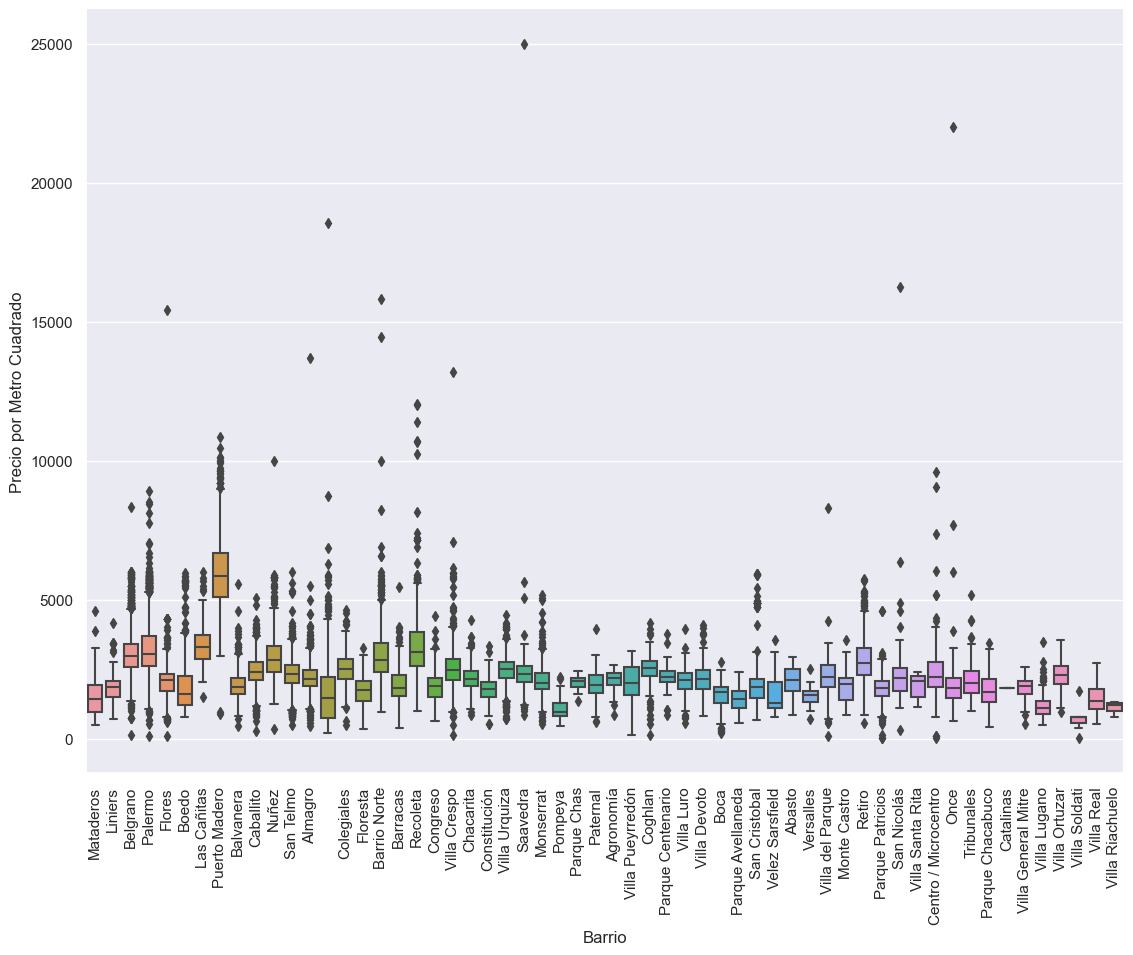

In [95]:
#Graficamos boxplot de cada barrio de CABA
g_box_barrio_caba = sns.catplot(x = "barrio", y = "price_usd_per_m2", data=precio_por_barrio_caba, kind="box",height=8.27, aspect=11.7/8.27)
g_box_barrio_caba.set_axis_labels("Barrio", "Precio por Metro Cuadrado")  
g_box_barrio_caba.set_xticklabels(rotation=90) 

Ahora aplicamos filtros para remover outliers

In [96]:
#Creo un dataframe con los precio filtrados
#lim_sup_precio=500000
precio_barrio_caba_filtrado=precio_por_barrio_caba.loc[precio_por_barrio_caba['price_usd_per_m2']<lim_sup_precio_m2]

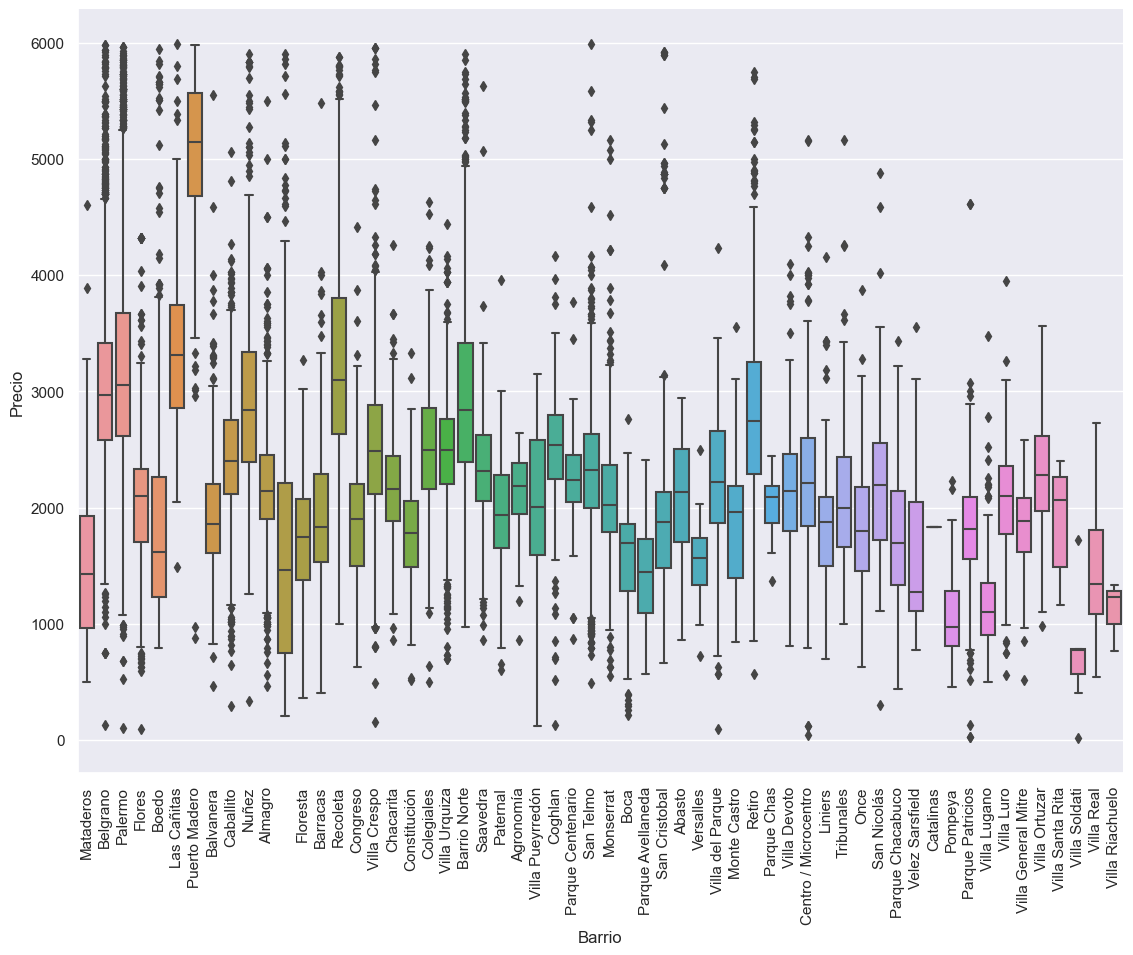

In [97]:
#Graficamos boxplot de cada barrio
g_box_barrio_caba_filtrado = sns.catplot(x = "barrio", y = "price_usd_per_m2", data=precio_barrio_caba_filtrado, kind="box",height=8.27, aspect=11.7/8.27)
g_box_barrio_caba_filtrado .set_axis_labels("Barrio", "Precio")  
g_box_barrio_caba_filtrado .set_xticklabels(rotation=90) 

## 4.3 Visualizamos la distribución de superficie total de las propiedades

Distribución de las superficies total de todas las propiedades

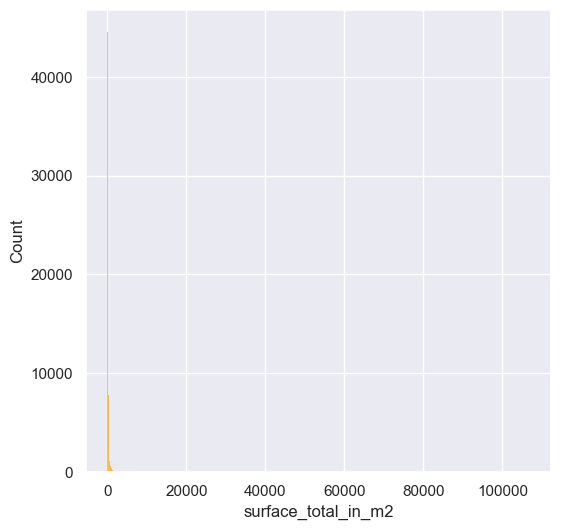

In [98]:
g_sup=sns.histplot(datos['surface_total_in_m2'], color = "orange", binwidth=100)

Visualizamos la distribución de superficie total de las propiedades aplicando un límite superior al eje X

[(0.0, 2000.0)]

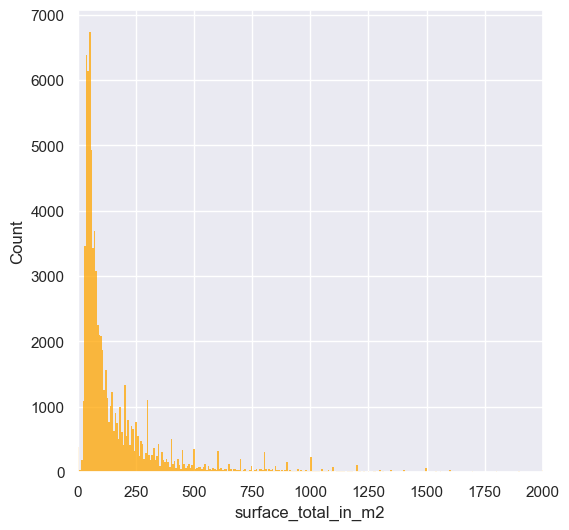

In [99]:
g_sup_filtrado=sns.histplot(datos['surface_total_in_m2'], color = "orange")#, binwidth=20)
g_sup_filtrado.set(xlim=(0,lim_sup_surface))

In [100]:
#Vemos los valores estadísticos de la superficie total de las propiedades
datos['surface_total_in_m2'].describe()

count     79277.000000
mean        195.453259
std         904.694936
min           0.000000
25%          50.000000
50%          83.000000
75%         198.000000
max      107000.000000
Name: surface_total_in_m2, dtype: float64

Veamos que valores tiene el top 10 de propiedades con mayor superficie

In [101]:
top10_superficie=datos.nlargest(10,'surface_total_in_m2')

display(top10_superficie[['ciudad','property_type','surface_total_in_m2','rooms','price_aprox_usd','price_usd_per_m2']])

ciudad property_type  surface_total_in_m2  rooms  \
86665           Córdoba     apartment             107000.0    NaN   
86687           Córdoba     apartment             107000.0    NaN   
35226          Brandsen         house             100350.0    NaN   
106376  Lomas de Zamora         store              93000.0    NaN   
2979        Punta Indio         house              50000.0    4.0   
39620     Campo Quijano         house              35623.0    NaN   
8334         San Rafael         house              30000.0    NaN   
61892             Lobos         house              30000.0    NaN   
101068                          house              27000.0    NaN   
8354         San Rafael         house              26000.0    NaN   

        price_aprox_usd  price_usd_per_m2  
86665               NaN               NaN  
86687               NaN               NaN  
35226               NaN               NaN  
106376        6000000.0         64.516129  
2979                NaN               NaN  
39620               NaN               NaN  
8334                NaN               NaN  
61892               NaN               NaN  
101068              NaN               NaN  
8354                NaN               NaN

<AxesSubplot:xlabel='surface_total_in_m2', ylabel='Count'>

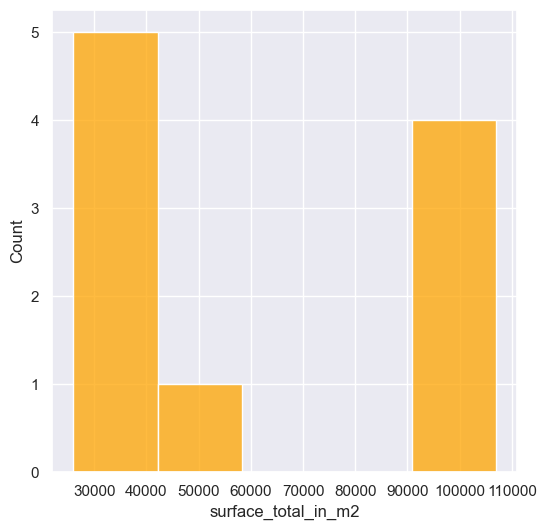

In [102]:
sns.histplot(top10_superficie['surface_total_in_m2'], color = "orange")#, binwidth=5000)

## 4.4 Visualizamos cantidades de propiedades publicadas según su tipo y ubicación geográfica



In [103]:
#creamos una lista con las primeras 10 provincias
lista_top_provincia=datos['provincia'].value_counts().index[:10].to_list()

#Usamos la lista para crear un dataframe filtrado
top_provincias= datos[datos['provincia'].isin(lista_top_provincia)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capital Federal'),
  Text(1, 0, 'Bs.As. G.B.A. Zona Sur'),
  Text(2, 0, 'Buenos Aires Costa Atlántica'),
  Text(3, 0, 'Bs.As. G.B.A. Zona Norte'),
  Text(4, 0, 'Santa Fe'),
  Text(5, 0, 'Córdoba'),
  Text(6, 0, 'Bs.As. G.B.A. Zona Oeste'),
  Text(7, 0, 'Buenos Aires Interior'),
  Text(8, 0, 'Neuquén'),
  Text(9, 0, 'Río Negro')])

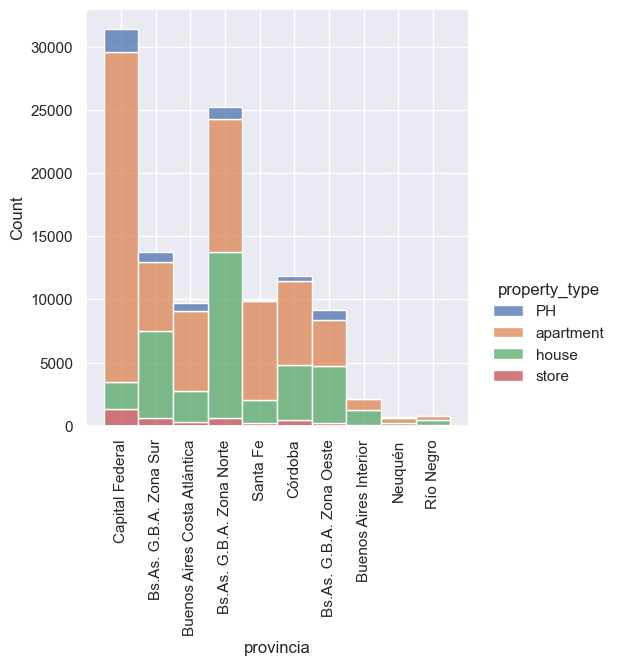

In [104]:
#Usamos una displot con stack 

g_prov_tipo=sns.displot(data=top_provincias, x="provincia", hue="property_type", multiple="stack", stat="count")
g_prov_tipo=sns.set(rc={'figure.figsize':(12,14)})
plt.xticks(rotation=90)



Visualizamos este top de provincias habiendo filtrado los outliers y utilizando boxplot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capital Federal'),
  Text(1, 0, 'Buenos Aires Costa Atlántica'),
  Text(2, 0, 'Bs.As. G.B.A. Zona Norte'),
  Text(3, 0, 'Bs.As. G.B.A. Zona Oeste'),
  Text(4, 0, 'Córdoba'),
  Text(5, 0, 'Bs.As. G.B.A. Zona Sur'),
  Text(6, 0, 'Santa Fe'),
  Text(7, 0, 'Buenos Aires Interior'),
  Text(8, 0, 'Neuquén'),
  Text(9, 0, 'Río Negro')])

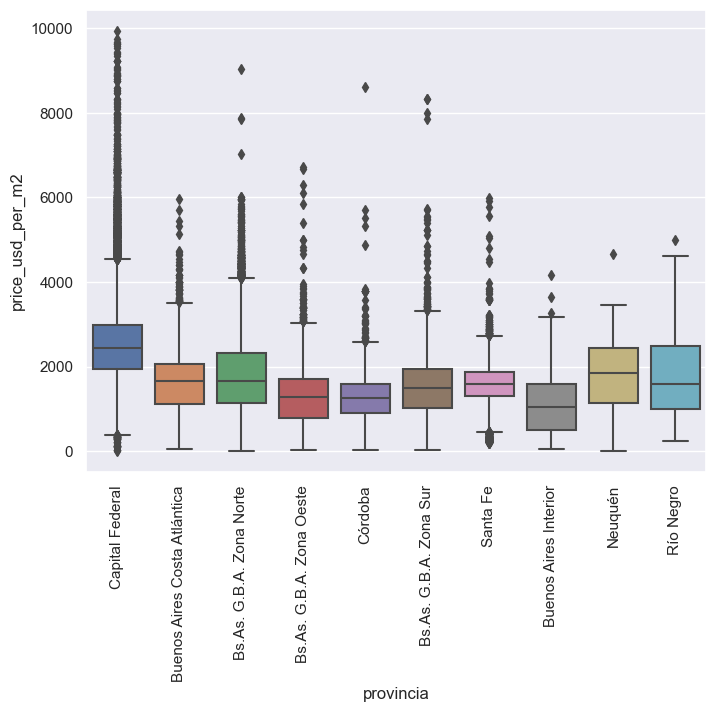

In [105]:
top_provincias_filtradas=top_provincias.loc[top_provincias['price_usd_per_m2']<10000]

plt.figure(figsize=(8, 6))

sns.boxplot(data=top_provincias_filtradas, x="provincia", y='price_usd_per_m2')#, hue="property_type")
plt.xticks(rotation=90)

### Realizamos la misma visualización para los barrios de CABA con mayor cantidad de propiedades publicadas

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Belgrano'),
  Text(1, 0, 'Palermo'),
  Text(2, 0, 'Flores'),
  Text(3, 0, 'Caballito'),
  Text(4, 0, 'San Telmo'),
  Text(5, 0, 'Almagro'),
  Text(6, 0, 'Recoleta'),
  Text(7, 0, 'Villa Crespo'),
  Text(8, 0, 'Villa Urquiza')])

<Figure size 3000x2800 with 0 Axes>

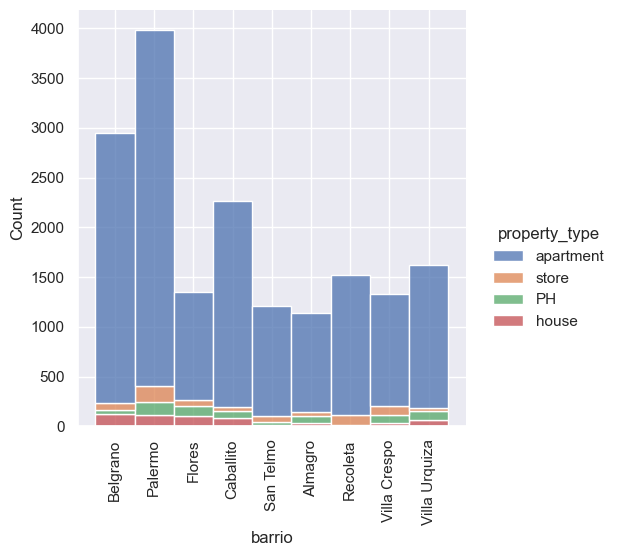

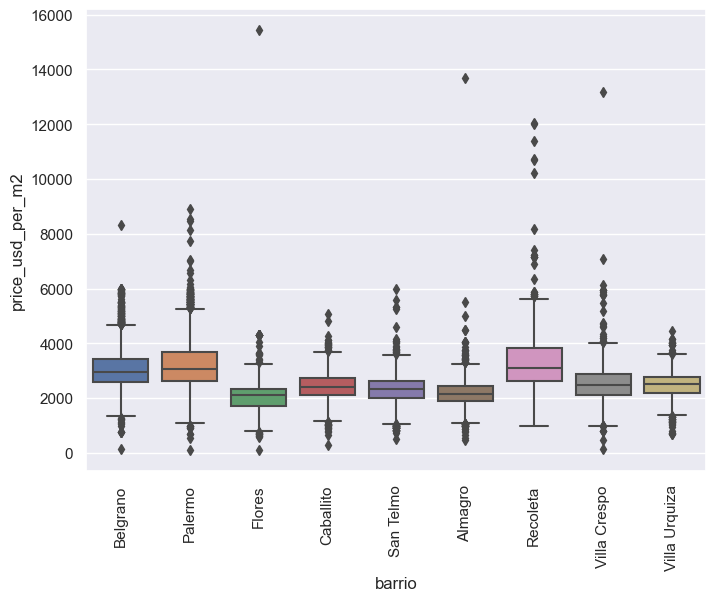

In [106]:
#Filtro aquellas propiedades que estan en caba
caba_filtrada=datos.loc[datos['ciudad']=='Capital Federal']

top_barrio_caba=caba_filtrada['barrio'].value_counts().index[:10].to_list()
#especies = arbolado['nombre_cientifico'].value_counts().index[:3].to_list()
#arbolado = arbolado[arbolado['nombre_cientifico'].isin(especies)]

top_caba= datos[datos['barrio'].isin(top_barrio_caba)]

#top_caba=datos['ciudad'].value_counts().index[:10].to_list()
top_caba_sin_vacios=top_caba.loc[top_caba['barrio']!='']
plt.figure(figsize=(30, 28))

sns.displot(data=top_caba_sin_vacios, x="barrio", hue="property_type", multiple="stack", stat="count")
plt.xticks(rotation=90)

plt.figure(figsize=(8, 6))

sns.boxplot(data=top_caba_sin_vacios, x="barrio", y='price_usd_per_m2')#, hue="property_type")
plt.xticks(rotation=90)


## 5- Análisis y Visualización Geográfica

Primero transormamos nuestro DataFrame a GeoDataFrame

In [78]:
#Creamos la columna geometry para transformar el data set en un GeoDataFrame
datos = gpd.GeoDataFrame(datos,geometry=gpd.points_from_xy(datos.lon, datos.lat))
datos.head(3)

property_type        lat        lon  price_aprox_usd  surface_total_in_m2  \
0            PH -34.661824 -58.508839          62000.0                 55.0   
1     apartment -34.903883 -57.964330         150000.0                  NaN   
2     apartment -34.652262 -58.522982          72000.0                 55.0   

   surface_covered_in_m2  price_usd_per_m2  floor  rooms  expenses  ...  \
0                   40.0       1127.272727    NaN    NaN       NaN  ...   
1                    NaN               NaN    NaN    NaN       NaN  ...   
2                   55.0       1309.090909    NaN    NaN       NaN  ...   

                                               title               provincia  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB         Capital Federal   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...  Bs.As. G.B.A. Zona Sur   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO         Capital Federal   

            ciudad     barrio cochera  parrilla  patio  pileta  vista  \
0  Capital Federal  Mataderos   False     False  False   False  False   
1         La Plata               True     False  False   False   True   
2  Capital Federal  Mataderos   False     False  False   False  False   

                      geometry  
0  POINT (-58.50884 -34.66182)  
1  POINT (-57.96433 -34.90388)  
2  POINT (-58.52298 -34.65226)  

[3 rows x 21 columns]

### 5.1 Visualización geográfica de propiedades en CABA
Bajamos el mapa de las comunas de CABA para visualizar las propiedades en la ciudad

In [108]:
#Leemos el dataset de la página del GCBA
comunas = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/comunas/comunas.csv")

#Trasnformamos la columna WKT
comunas["WKT"] = comunas["WKT"].apply(shapely.wkt.loads) 

# Creamos el GeoComunas
geo_comunas = gpd.GeoDataFrame(comunas, geometry='WKT')


Ahora graficamos las propiedades del dataset sobre el mapa de CABA

<AxesSubplot:>

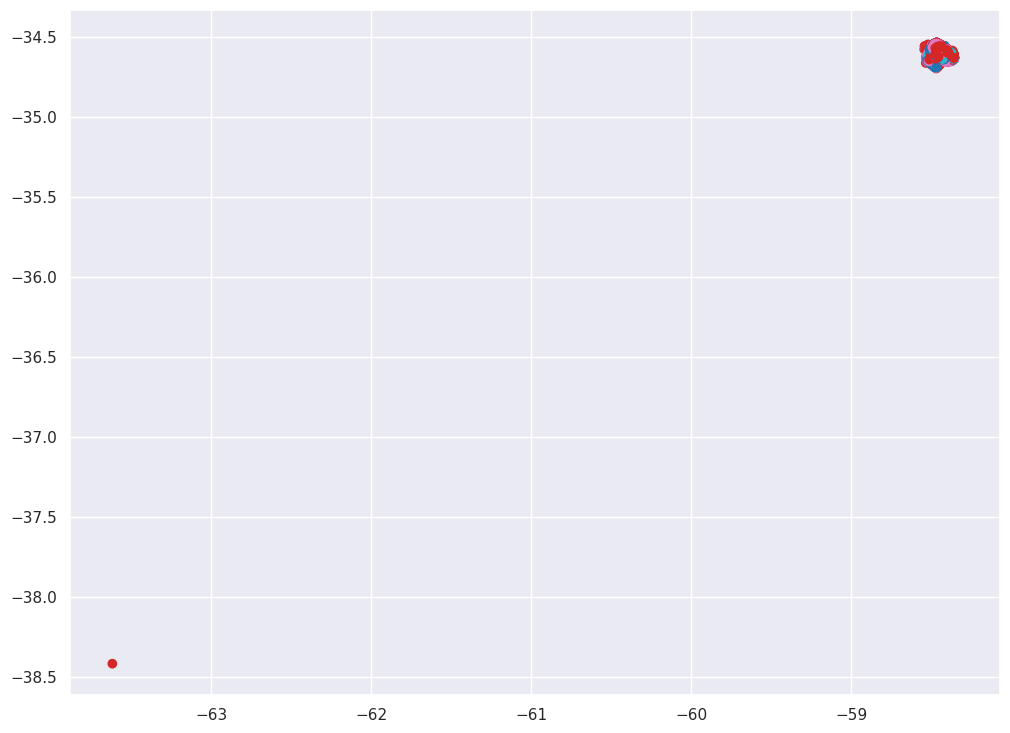

In [109]:
#Creamos una figura y sus ejes
fig, ax = plt.subplots()

plt.style.use('default')
#Ploteamos los datos de geo_comunas
geo_comunas.plot(ax=ax, facecolor="none", edgecolor='black')
#Filtramos las propiedades que no son de CABA y las graficamos separadas por tipo de propiedad
datos.loc[datos['ciudad']=='Capital Federal'].plot(ax=ax, column='property_type')

Vemos que hay un registro con un dato incorrecto

In [79]:
#Vemos que hay un valor erroneo, no esta en capital federal su ubicación de lat lon
#Creo un df con las propiedades de CABA
propiedades_caba=datos.loc[datos['ciudad']=='Capital Federal']

In [80]:
#Filtro por el limite de latitud
lat_limite= -38

mask_lejanas_CABA=propiedades_caba.lat < lat_limite

display(propiedades_caba.loc[mask_lejanas_CABA])

property_type        lat        lon  price_aprox_usd  \
28512     apartment -38.416097 -63.616672          45000.0   

       surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  floor  \
28512                 70.0                   70.0        642.857143    NaN   

       rooms  expenses  ...               title        provincia  \
28512    3.0       NaN  ...  Departamento venta  Capital Federal   

                ciudad     barrio cochera  parrilla  patio  pileta  vista  \
28512  Capital Federal  Mataderos   False     False  False   False  False   

                          geometry  
28512  POINT (-63.61667 -38.41610)  

[1 rows x 21 columns]

Es un departamento publicado en Mataderos, concluimos que hubo un error de tipeo en los datos de lat-lon

In [112]:
mascara_cercanas_CABA=propiedades_caba.lat > lat_limite

In [113]:
caba_geo_filtrada=propiedades_caba.loc[mascara_cercanas_CABA]
caba_geo_filtrada.head(3)

property_type        lat        lon  price_aprox_usd  surface_total_in_m2  \
0            PH -34.661824 -58.508839          62000.0                 55.0   
2     apartment -34.652262 -58.522982          72000.0                 55.0   
3            PH -34.647797 -58.516424          95000.0                  NaN   

   surface_covered_in_m2  price_usd_per_m2  floor  rooms  expenses  ...  \
0                   40.0       1127.272727    NaN    NaN       NaN  ...   
2                   55.0       1309.090909    NaN    NaN       NaN  ...   
3                    NaN               NaN    NaN    3.0       NaN  ...   

                                      title        provincia           ciudad  \
0        2 AMB TIPO CASA SIN EXPENSAS EN PB  Capital Federal  Capital Federal   
2  2 AMB 3ER PISO CON ASCENSOR APTO CREDITO  Capital Federal  Capital Federal   
3              PH 3 amb. cfte. reciclado     Capital Federal  Capital Federal   

      barrio cochera  parrilla  patio  pileta  vista  \
0  Mataderos   False     False  False   False  False   
2  Mataderos   False     False  False   False  False   
3    Liniers   False     False   True   False  False   

                      geometry  
0  POINT (-58.50884 -34.66182)  
2  POINT (-58.52298 -34.65226)  
3  POINT (-58.51642 -34.64780)  

[3 rows x 21 columns]

Volvemos a visualizar habiendo retirado el valor incorrecto

<AxesSubplot:>

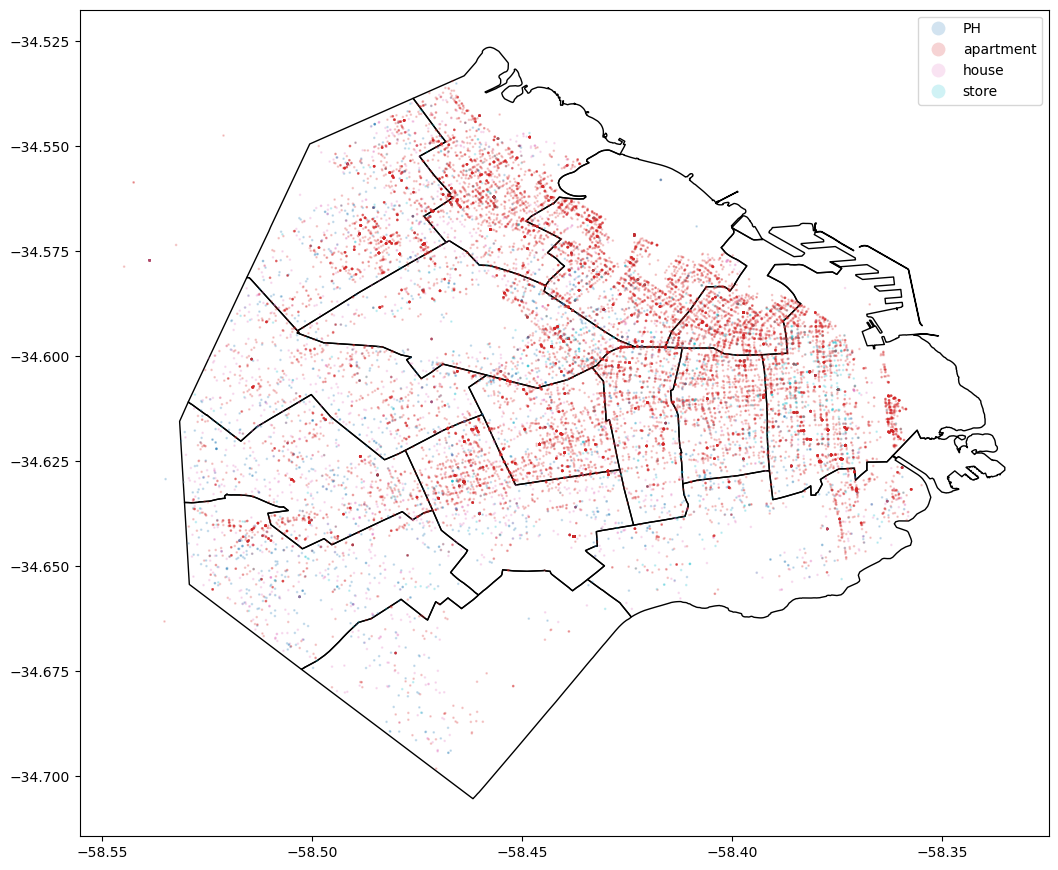

In [114]:
#Defino una figura y ejes
fig, ax = plt.subplots()
#Defino el tamaño de la figura
fig.set_size_inches(12.5, 12.5)
#Graficamos las comunas de CABA
geo_comunas.plot(ax=ax, facecolor="none", edgecolor='black')

#Graficamos las propiedades segun tipo
caba_geo_filtrada.plot(ax=ax, column='property_type',markersize=0.8,marker='o',alpha=0.2, legend='property_type')

Ahora graficamos un scatter de los precios contra la superficie de la propiedad discriminando por tipo de propiedad

In [115]:
mascara_precio=datos['price_aprox_usd']<lim_sup_precio
mascara_sup=datos['surface_total_in_m2']<lim_sup_surface
mascara_precio_m2= datos['price_usd_per_m2']<lim_sup_precio_m2

datos_filtrados=datos.loc[mascara_precio & mascara_sup & mascara_precio_m2 ]


px
plt.style.use('default')
fig = px.scatter(data_frame = datos_filtrados, y = "price_aprox_usd", x = "surface_total_in_m2", color='property_type',
                 opacity = 0.6, symbol='property_type',
                 size='price_usd_per_m2',
                 width=1000, height=700)

fig.update_xaxes(rangeslider_visible=True)

fig.show()

Hacemos el mismo análisis solo para CABA

In [116]:
datos_filtrados_caba=datos_filtrados.loc[datos_filtrados['ciudad']=='Capital Federal']

px
plt.style.use('default')
fig = px.scatter(data_frame = datos_filtrados_caba, y = "price_aprox_usd", x = "surface_total_in_m2", color='property_type',
                 opacity = 0.6, symbol='property_type',  
                 size='price_usd_per_m2',
                 width=1000, height=700)

fig.update_xaxes(rangeslider_visible=True)

fig.show()

Ahora repetimos el análisis utilizando lineas de tendencia

In [117]:
px
plt.style.use('default')
fig = px.scatter(data_frame = datos_filtrados_caba, y = "price_aprox_usd", x = "surface_total_in_m2", color='property_type',
                 opacity = 0.6, symbol='property_type', trendline="ols", 
                 size='price_usd_per_m2',
                 width=1000, height=700)

fig.update_xaxes(rangeslider_visible=True)

fig.show()

Se puede ver que las propiedades que son departamentos su precio sube más rápidamente en relación a la superficie total de la misma.

In [118]:
#creamos una lista con las primeras 10 provincias
lista_top_provincia=datos_filtrados['provincia'].value_counts().index[:9].to_list()

#Usamos la lista para crear un dataframe filtrado
top_provincias_filtradas_scat= datos_filtrados[datos_filtrados['provincia'].isin(lista_top_provincia)]


px
plt.style.use('default')
fig = px.scatter(data_frame = top_provincias_filtradas_scat, y = "price_aprox_usd", x = "surface_total_in_m2", color='property_type',
                 opacity = 0.6, symbol='property_type',
                 size='price_usd_per_m2',
                 facet_col_wrap = 3,facet_col='provincia',
                 width=1000, height=700)

fig.update_xaxes(rangeslider_visible=False)

fig.show()

In [119]:
caba_filtrada_scat=datos_filtrados.loc[datos_filtrados['ciudad']=='Capital Federal']

lista_top_barrio_caba_scat=caba_filtrada_scat['barrio'].value_counts().index[:9].to_list()
#especies = arbolado['nombre_cientifico'].value_counts().index[:3].to_list()
#arbolado = arbolado[arbolado['nombre_cientifico'].isin(especies)]

top_caba_scat= datos_filtrados[datos_filtrados['barrio'].isin(lista_top_barrio_caba_scat)]



px
plt.style.use('default')
fig = px.scatter(data_frame = top_caba_scat, y = "price_aprox_usd", x = "surface_total_in_m2", color='property_type',
                 opacity = 0.6, symbol='property_type',
                 size='price_usd_per_m2',
                 facet_col_wrap = 3,facet_col='barrio',
                 width=1000, height=700)

fig.update_xaxes(rangeslider_visible=False)

fig.show()

## 5.2 Mapa dinamico de Argentina difereciado por tipo de propiedad


In [120]:
#Generamos el DS para poder trabajar los graficos

tipo = datos.iloc[:, 0]
lat = datos.iloc[:, 1]
lon = datos.iloc[:, 2]
precio = datos.iloc[:, 6]

kepler = pd.concat([tipo, lat, lon, precio], axis=1)

kepler

property_type        lat        lon  price_usd_per_m2
0                 PH -34.661824 -58.508839       1127.272727
1          apartment -34.903883 -57.964330               NaN
2          apartment -34.652262 -58.522982       1309.090909
3                 PH -34.647797 -58.516424               NaN
4          apartment -38.002626 -57.549447       1828.571429
...              ...        ...        ...               ...
121214         store        NaN        NaN               NaN
121216         house        NaN        NaN       1383.333333
121217     apartment -34.570639 -58.475596       2858.695652
121218     apartment        NaN        NaN       1997.916667
121219     apartment        NaN        NaN       1675.324675

[118605 rows x 4 columns]

In [121]:
#Validamos la cantidad de campos nulos en Kepler

kepler.isna().sum()

property_type           0
lat                 50526
lon                 50526
price_usd_per_m2    52603
dtype: int64

In [122]:
# Dropeamos los campos nulos

kepler = kepler.dropna()

In [123]:
# Contar cuantos tipos de propiedades hay en el dataset

n = len(pd.unique(kepler['property_type']))   

print(n)

kepler['property_type'].value_counts()

4


apartment    25371
house         9470
PH            2283
store         1235
Name: property_type, dtype: int64

In [124]:
#Pasamos a dataset

total = pd.DataFrame(kepler['property_type'].value_counts())

total

property_type
apartment          25371
house               9470
PH                  2283
store               1235

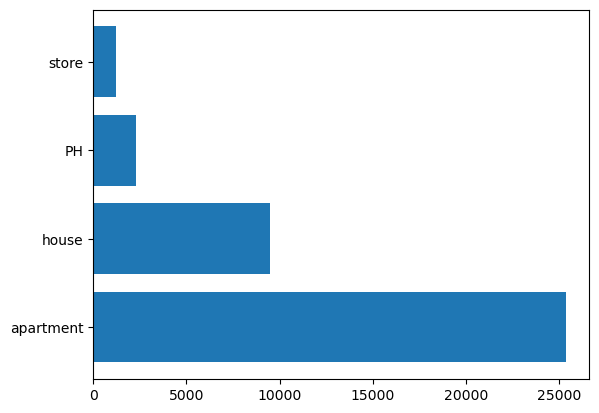

In [125]:
# Visualmente los tipos de propiedades

total = total.sum(axis=1)

plt.barh(total.index, total)
plt.show()


In [126]:
# Generamos un DS filtrado para los tipos de propiedad "PH"

PH = kepler['property_type'] == 'PH'

PH = kepler[PH]

PH

property_type        lat        lon  price_usd_per_m2
0                 PH -34.661824 -58.508839       1127.272727
6                 PH -34.532957 -58.521782       1226.415094
16                PH -34.652356 -58.501624       1707.142857
34                PH -34.527253 -58.512877        982.558140
46                PH -34.451855 -58.903567       1178.571429
...              ...        ...        ...               ...
120152            PH -34.592628 -58.546715        750.000000
120158            PH -38.003681 -57.570381       1115.384615
120178            PH -37.984712 -57.562793       1387.037037
120182            PH -38.011246 -57.543782       1454.545455
120202            PH -38.030114 -57.574442        714.285714

[2283 rows x 4 columns]

In [127]:
# Generamos un DS filtrado para los tipos de propiedad "Departamento"

apartment  = kepler['property_type'] == 'apartment'

apartment = kepler[apartment]

apartment

property_type        lat        lon  price_usd_per_m2
2          apartment -34.652262 -58.522982       1309.090909
4          apartment -38.002626 -57.549447       1828.571429
7          apartment -34.559873 -58.443362       3066.666667
8          apartment -34.559873 -58.443362       3000.000000
12         apartment -34.486019 -58.503814       2948.717949
...              ...        ...        ...               ...
121153     apartment -34.599214 -58.402519       1813.186813
121158     apartment -34.587425 -58.397372       3750.000000
121160     apartment -34.563685 -58.442683       2611.464968
121209     apartment -34.563685 -58.442683       2611.464968
121217     apartment -34.570639 -58.475596       2858.695652

[25371 rows x 4 columns]

In [128]:
# Generamos un DS filtrado para los tipos de propiedad "casa"

house  = kepler['property_type'] == 'house'

house = kepler[house]

house


property_type        lat        lon  price_usd_per_m2
15             house -34.587911 -58.698783       1524.390244
18             house -34.425087 -58.579659       2111.111111
22             house -34.650116 -58.966034       1450.000000
26             house -34.364092 -58.689735       1152.173913
27             house -34.479486 -58.984541       1529.411765
...              ...        ...        ...               ...
120191         house -31.419136 -64.483509        644.444444
120193         house -38.064047 -57.552241        584.795322
120200         house -38.023796 -57.573495        895.000000
120201         house -38.101714 -57.569597        450.000000
121057         house -34.636524 -58.429429       1300.813008

[9470 rows x 4 columns]

In [129]:
# Generamos un DS filtrado para los tipos de propiedad "Tiendas"

store  = kepler['property_type'] == 'store'

store = kepler[store]

store

property_type        lat        lon  price_usd_per_m2
57             store -34.563972 -58.456535       8333.333333
204            store -34.606297 -58.392189       2864.077670
215            store -34.590181 -58.449152       2187.500000
370            store -34.595967 -58.409774       4212.121212
555            store -34.624470 -58.371174       2186.666667
...              ...        ...        ...               ...
119804         store -34.612791 -58.378084       2372.881356
119805         store -34.627534 -58.428549       1055.408971
119987         store -34.602341 -58.376595       6285.714286
120149         store -38.010243 -57.545775       1580.000000
121125         store -34.637014 -58.433177        521.091811

[1235 rows x 4 columns]

In [130]:
# Importamos a Kepler "Herramienta que nos permite generar los mapas"

import requests
from keplergl import KeplerGl

PH

In [131]:
#Seleccionamos longitud y latidud para pasarlas a formato numerico

PH1 = PH[["lon", "lat"]]

PH1 = PH1.apply(pd.to_numeric)

# Creamos el mapa con la diferenciacion de colores en base a la columna "price_usd_per_m2"

mapa_PH = KeplerGl(height=800, data={"PH":PH},show_docs=False)

mapa_PH


KeplerGl(data={'PH':        property_type        lat        lon  price_usd_per_m2
0                 PH -34.661…

TIENDAS

In [132]:
#Seleccionamos longitud y latidud para pasarlas a formato numerico

store1 = store[["lon", "lat"]]

store1 = store1.apply(pd.to_numeric)

# Creamos el mapa con la diferenciacion de colores en base a la columna "price_usd_per_m2"

mapa_store = KeplerGl(height=800, data={"store":store},show_docs=False)

mapa_store

KeplerGl(data={'store':        property_type        lat        lon  price_usd_per_m2
57             store -34.…

CASAS

In [133]:
#Seleccionamos longitud y latidud para pasarlas a formato numerico

house1 = house[["lon", "lat"]]

house1 = house1.apply(pd.to_numeric)

# Creamos el mapa con la diferenciacion de colores en base a la columna "price_usd_per_m2"

mapa_house = KeplerGl(height=800, data={"house":house},show_docs=False)

mapa_house


KeplerGl(data={'house':        property_type        lat        lon  price_usd_per_m2
15             house -34.…

DEPARTAMENTOS

In [134]:
#Seleccionamos longitud y latidud para pasarlas a formato numerico

apartment1 = apartment[["lon", "lat"]]

apartment1 = apartment1.apply(pd.to_numeric)

# Creamos el mapa con la diferenciacion de colores en base a la columna "price_usd_per_m2"

mapa_apartment = KeplerGl(height=800, data={"apartment":apartment},show_docs=False)

mapa_apartment

KeplerGl(data={'apartment':        property_type        lat        lon  price_usd_per_m2
2          apartment …

In [90]:
# aca me exporto el data set
#Filtro por el limite de latitud
datos_caba=datos.loc[datos['provincia'] == 'Capital Federal']

lat_limite= -38

mask_lejanas_CABA=datos_caba.lat < lat_limite

#lista_lejana=datos.loc[mask_lejanas_CABA].index

#datos_exportar = datos.drop(lista_lejana, axis=0)

#lat_limite= -38


display(datos_caba.loc[mask_lejanas_CABA])

#datos_exportar=datos.drop(28512,axis=0)


property_type        lat        lon  price_aprox_usd  \
28512     apartment -38.416097 -63.616672          45000.0   

       surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  floor  \
28512                 70.0                   70.0        642.857143    NaN   

       rooms  expenses  ...               title        provincia  \
28512    3.0       NaN  ...  Departamento venta  Capital Federal   

                ciudad     barrio cochera  parrilla  patio  pileta  vista  \
28512  Capital Federal  Mataderos   False     False  False   False  False   

                          geometry  
28512  POINT (-63.61667 -38.41610)  

[1 rows x 21 columns]

In [91]:
datos_exportar=datos_caba.drop(28512,axis=0)

In [93]:
datos_exportar=datos_exportar.loc[datos_exportar['property_type']=='apartment']

In [94]:
datos_exportar.to_csv('datos_TP2.csv')

## 6- Implementación de Variables Dummies

In [135]:
# tomamos solo departamentos de capital federal y ordenamos según cantidad y exlcuimos un caso que es nulo
# armamos la lista para armar las dummies
MaskDummies1 = (datos['provincia'] == 'Capital Federal') & (datos['property_type'] == 'apartment')
CantDeptosCap = datos[MaskDummies1].groupby('barrio').agg({'price_usd_per_m2': 'count'}).sort_values(by='price_usd_per_m2', ascending=False)
MaskDummies2 = (CantDeptosCap.index != "") & (CantDeptosCap['price_usd_per_m2'] >= 100)
ListDummies = CantDeptosCap[MaskDummies2].index
ListDummies

Index(['Palermo', 'Belgrano', 'Caballito', 'Recoleta', 'Villa Urquiza',
       'San Telmo', 'Villa Crespo', 'Flores', 'Barrio Norte', 'Almagro',
       'Puerto Madero', 'Nuñez', 'Balvanera', 'Saavedra', 'Boedo',
       'Villa del Parque', 'Monserrat', 'Barracas', 'Villa Luro',
       'San Cristobal', 'Colegiales', 'Congreso', 'Floresta', 'Villa Devoto',
       'Parque Patricios', 'Coghlan', 'Liniers', 'Retiro', 'Chacarita',
       'Centro / Microcentro', 'Boca', 'Constitución', 'Las Cañitas',
       'Mataderos', 'San Nicolás', 'Once'],
      dtype='object', name='barrio')

In [136]:
MaskDummies3 = datos['barrio'].isin(ListDummies)
datosDummies = pd.get_dummies(datos[MaskDummies3]['barrio'])
datos = pd.merge(datos, datosDummies, how='left', left_index=True, right_index=True)
datos


property_type        lat        lon  price_aprox_usd  \
0                 PH -34.661824 -58.508839          62000.0   
1          apartment -34.903883 -57.964330         150000.0   
2          apartment -34.652262 -58.522982          72000.0   
3                 PH -34.647797 -58.516424          95000.0   
4          apartment -38.002626 -57.549447          64000.0   
...              ...        ...        ...              ...   
121214         store        NaN        NaN              NaN   
121216         house        NaN        NaN         498000.0   
121217     apartment -34.570639 -58.475596         131500.0   
121218     apartment        NaN        NaN          95900.0   
121219     apartment        NaN        NaN         129000.0   

        surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  floor  \
0                      55.0                   40.0       1127.272727    NaN   
1                       NaN                    NaN               NaN    NaN   
2                      55.0                   55.0       1309.090909    NaN   
3                       NaN                    NaN               NaN    NaN   
4                      35.0                   35.0       1828.571429    NaN   
...                     ...                    ...               ...    ...   
121214                123.0                  123.0               NaN    NaN   
121216                360.0                  360.0       1383.333333    NaN   
121217                 46.0                   39.0       2858.695652    NaN   
121218                 48.0                   48.0       1997.916667    NaN   
121219                 77.0                   77.0       1675.324675    NaN   

        rooms  expenses  ... Retiro Saavedra San Cristobal San Nicolás  \
0         NaN       NaN  ...    0.0      0.0           0.0         0.0   
1         NaN       NaN  ...    NaN      NaN           NaN         NaN   
2         NaN       NaN  ...    0.0      0.0           0.0         0.0   
3         3.0       NaN  ...    0.0      0.0           0.0         0.0   
4         NaN       NaN  ...    NaN      NaN           NaN         NaN   
...       ...       ...  ...    ...      ...           ...         ...   
121214    NaN       NaN  ...    NaN      NaN           NaN         NaN   
121216    NaN       NaN  ...    NaN      NaN           NaN         NaN   
121217    NaN       NaN  ...    0.0      0.0           0.0         0.0   
121218    NaN       NaN  ...    NaN      NaN           NaN         NaN   
121219    NaN    3500.0  ...    NaN      NaN           NaN         NaN   

       San Telmo  Villa Crespo  Villa Devoto  Villa Luro  Villa Urquiza  \
0            0.0           0.0           0.0         0.0            0.0   
1            NaN           NaN           NaN         NaN            NaN   
2            0.0           0.0           0.0         0.0            0.0   
3            0.0           0.0           0.0         0.0            0.0   
4            NaN           NaN           NaN         NaN            NaN   
...          ...           ...           ...         ...            ...   
121214       NaN           NaN           NaN         NaN            NaN   
121216       NaN           NaN           NaN         NaN            NaN   
121217       0.0           0.0           0.0         0.0            1.0   
121218       NaN           NaN           NaN         NaN            NaN   
121219       NaN           NaN           NaN         NaN            NaN   

        Villa del Parque  
0                    0.0  
1                    NaN  
2                    0.0  
3                    0.0  
4                    NaN  
...                  ...  
121214               NaN  
121216               NaN  
121217               0.0  
121218               NaN  
121219               NaN  

[118605 rows x 57 columns]

# Trabajo Práctico N° 2

En el primer TP leimos, analizamos y limpiamos el data set de la inmobiliaria Properatti.

Vamos a tratar de predecir los valores de precio por metro cuadrado en la Ciudad Autónoma de Buenos Aires mediante tres modelos distintos.


## 1- Preparo los datos

In [137]:
#Separamos los datos de CABA para los modelos a analizar
# Como vamos a analizar precio/m2, tiene sentido analizar grandes centros urbanos
datos_caba=datos.loc[datos['provincia'] == 'Capital Federal']

In [138]:
datos_caba.provincia.value_counts()

Capital Federal    31385
Name: provincia, dtype: int64

In [139]:
datos_caba.ciudad.value_counts()

Capital Federal    31385
Name: ciudad, dtype: int64

Como ya filtramos CABA, hacemos drop a las columnas Ciudad y Provincia

In [140]:
datos_caba=datos_caba.drop(['provincia','ciudad'],axis=1)
# datos = datos.drop('price_per_m2', axis=1)

In [141]:
datos_caba.head()

property_type        lat        lon  price_aprox_usd  surface_total_in_m2  \
0            PH -34.661824 -58.508839          62000.0                 55.0   
2     apartment -34.652262 -58.522982          72000.0                 55.0   
3            PH -34.647797 -58.516424          95000.0                  NaN   
7     apartment -34.559873 -58.443362         138000.0                 45.0   
8     apartment -34.559873 -58.443362         195000.0                 65.0   

   surface_covered_in_m2  price_usd_per_m2  floor  rooms  expenses  ...  \
0                   40.0       1127.272727    NaN    NaN       NaN  ...   
2                   55.0       1309.090909    NaN    NaN       NaN  ...   
3                    NaN               NaN    NaN    3.0       NaN  ...   
7                   40.0       3066.666667    NaN    NaN       NaN  ...   
8                   60.0       3000.000000    NaN    NaN       NaN  ...   

  Retiro Saavedra San Cristobal  San Nicolás  San Telmo  Villa Crespo  \
0    0.0      0.0           0.0          0.0        0.0           0.0   
2    0.0      0.0           0.0          0.0        0.0           0.0   
3    0.0      0.0           0.0          0.0        0.0           0.0   
7    0.0      0.0           0.0          0.0        0.0           0.0   
8    0.0      0.0           0.0          0.0        0.0           0.0   

   Villa Devoto  Villa Luro Villa Urquiza  Villa del Parque  
0           0.0         0.0           0.0               0.0  
2           0.0         0.0           0.0               0.0  
3           0.0         0.0           0.0               0.0  
7           0.0         0.0           0.0               0.0  
8           0.0         0.0           0.0               0.0  

[5 rows x 55 columns]

In [142]:
barrios_dummies = pd.get_dummies(datos_caba['barrio'])
#datos_caba = pd.merge(datos_caba, barrios_dummies, how='left', left_index=True, right_index=True)

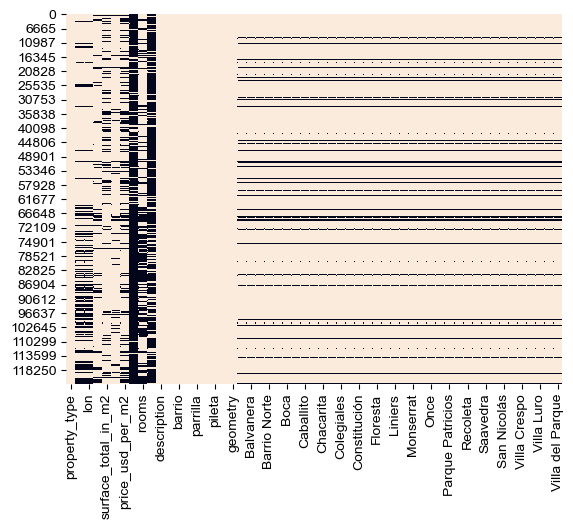

In [143]:
sns.heatmap(datos_caba.notnull(),cbar=False)
#Seteamos el tamaño de nuestro plot
sns.set(rc={'figure.figsize':(8,8)})

In [144]:
datos_caba.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 31385 entries, 0 to 121219
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   property_type          31385 non-null  object  
 1   lat                    23461 non-null  float64 
 2   lon                    23461 non-null  float64 
 3   price_aprox_usd        28087 non-null  float64 
 4   surface_total_in_m2    25506 non-null  float64 
 5   surface_covered_in_m2  29068 non-null  float64 
 6   price_usd_per_m2       22503 non-null  float64 
 7   floor                  3000 non-null   float64 
 8   rooms                  19685 non-null  float64 
 9   expenses               6526 non-null   float64 
 10  description            31385 non-null  object  
 11  title                  31385 non-null  object  
 12  barrio                 31385 non-null  object  
 13  cochera                31385 non-null  bool    
 14  parrilla               31385 

C:\Users\fpeloso\AppData\Local\Temp\ipykernel_1080\3294731994.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator



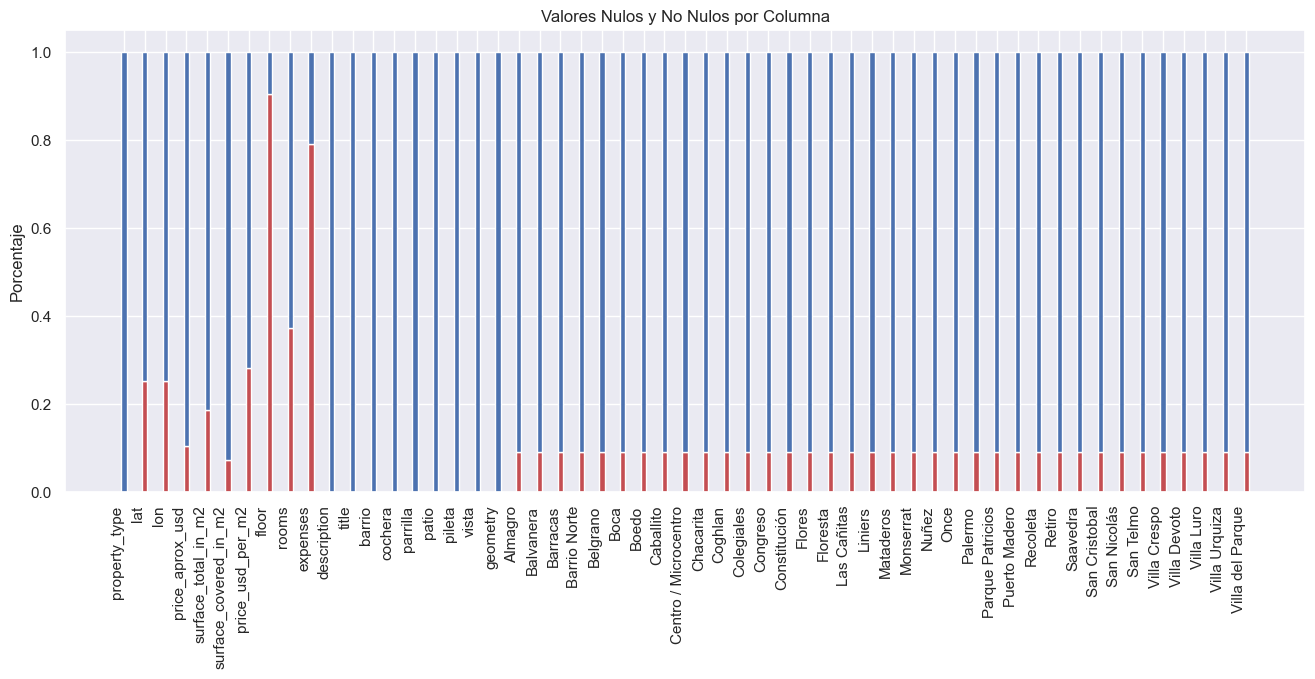

In [145]:
ind=datos_caba.columns

#Definimos un ancho para las barras
width = 0.25

#Calculo nuevamente los valores nulos y nulos en cada columna
valores_nulos_caba=datos_caba.isnull().sum()/datos_caba.shape[0]
valores_no_nulos_caba=datos_caba.notnull().sum()/datos_caba.shape[0]

#Creamos la figura y los ejes. Definimos tamaño de la figura
fig = plt.figure(figsize=(16,6)); ax = plt.axes()

#Graficamos valores nulos con color rojo
ax.bar(ind, valores_nulos_caba, width, color='r') 
#Graficamos valores no nulos con color azul por debajo
ax.bar(ind, valores_no_nulos_caba, width, color='b',bottom=valores_nulos_caba)
 
#Indico etiquetas en eje X e Y
ax.set_ylabel('Porcentaje'); ax.set_title('Valores Nulos y No Nulos por Columna')
 
#Configuramos ticks
ax.tick_params(axis='both', which='minor', labelsize='small')
#Etiquetas de los campos a 90 grados
ax.set_xticklabels(ind, rotation = 90, ha="right")

plt.show()

### Ahora filtramos unicamente los tipos de propiedades que sean departamentos

In [146]:
datos_caba_depto=datos_caba.loc[datos_caba['property_type']=='apartment']

In [147]:
datos_caba_depto.head()

property_type        lat        lon  price_aprox_usd  surface_total_in_m2  \
2      apartment -34.652262 -58.522982          72000.0                 55.0   
7      apartment -34.559873 -58.443362         138000.0                 45.0   
8      apartment -34.559873 -58.443362         195000.0                 65.0   
13     apartment        NaN        NaN         111700.0                 50.0   
14     apartment        NaN        NaN         147900.0                 42.0   

    surface_covered_in_m2  price_usd_per_m2  floor  rooms  expenses  ...  \
2                    55.0       1309.090909    NaN    NaN       NaN  ...   
7                    40.0       3066.666667    NaN    NaN       NaN  ...   
8                    60.0       3000.000000    NaN    NaN       NaN  ...   
13                   30.0       2234.000000    NaN    1.0       NaN  ...   
14                   31.0       3521.428571    NaN    1.0       NaN  ...   

   Retiro Saavedra San Cristobal  San Nicolás  San Telmo  Villa Crespo  \
2     0.0      0.0           0.0          0.0        0.0           0.0   
7     0.0      0.0           0.0          0.0        0.0           0.0   
8     0.0      0.0           0.0          0.0        0.0           0.0   
13    0.0      0.0           0.0          0.0        0.0           0.0   
14    0.0      0.0           0.0          0.0        0.0           0.0   

    Villa Devoto  Villa Luro Villa Urquiza  Villa del Parque  
2            0.0         0.0           0.0               0.0  
7            0.0         0.0           0.0               0.0  
8            0.0         0.0           0.0               0.0  
13           0.0         0.0           0.0               0.0  
14           0.0         0.0           0.0               0.0  

[5 rows x 55 columns]

In [148]:
datos_caba_depto.price_usd_per_m2.isnull().sum()

7141

In [149]:
Nulos_caba = datos_caba_depto['price_usd_per_m2'].isnull()
listaNulos_caba = datos_caba_depto[Nulos_caba].index
datos_TP2 = datos_caba_depto.drop(listaNulos_caba, axis=0)

In [150]:
datos_TP2.price_usd_per_m2.isnull().sum()

0

In [151]:
#Filtro por el limite de latitud
lat_limite= -38

mask_lejanas_CABA=datos_TP2.lat < lat_limite

#display(datos_TP2.loc[mask_lejanas_CABA])

datos_TP2=datos_TP2.drop(28512,axis=0)

# 2- Implementación de Modelos

### Ahora tengo un data set sin valores nulos en la columna que queremos predecir 'price_usd_per_m2'.

### Variable ' y ' o target: 'price_usd_per_m2'

### Debemos determinar cuales serán las 'features' que usaremos como predictoras

Primero podemos utilizar correlaciones, scatterplot y regresión lineal simple para determinar cuales son las mejores variables predictoras.

Para una mayor facilidad de lectura, primero veremos las relaciones entre las variables sin tener en cuenta las dummies de lo barrios.

## 2.1 Análisis de Variables mediante gráficos

In [152]:
### Primero ver correlación pair plot entre variables

# sns.heatmap(advertising.corr(), annot=True, vmin=-1, cmap='Blues');

#Creo un nuevo df con las variables que quiero analizar
datos_TP2_filtro=datos_TP2[['price_usd_per_m2','lat','lon','surface_total_in_m2','rooms']]

In [153]:
datos_TP2_filtro.head()

price_usd_per_m2        lat        lon  surface_total_in_m2  rooms
2        1309.090909 -34.652262 -58.522982                 55.0    NaN
7        3066.666667 -34.559873 -58.443362                 45.0    NaN
8        3000.000000 -34.559873 -58.443362                 65.0    NaN
13       2234.000000        NaN        NaN                 50.0    1.0
14       3521.428571        NaN        NaN                 42.0    1.0

### Utilizamos la matriz de correlaciones para ver si alguna de estas features tiene valor predictivo para el target

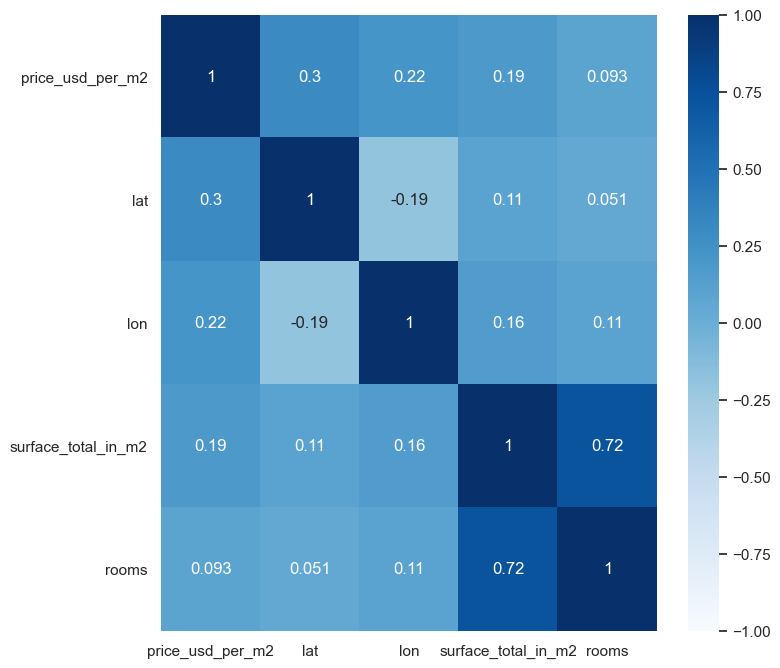

In [154]:

sns.heatmap(datos_TP2_filtro.corr(), annot=True, vmin=-1, cmap='Blues');
sns.set(rc={'figure.figsize':(8,8)})

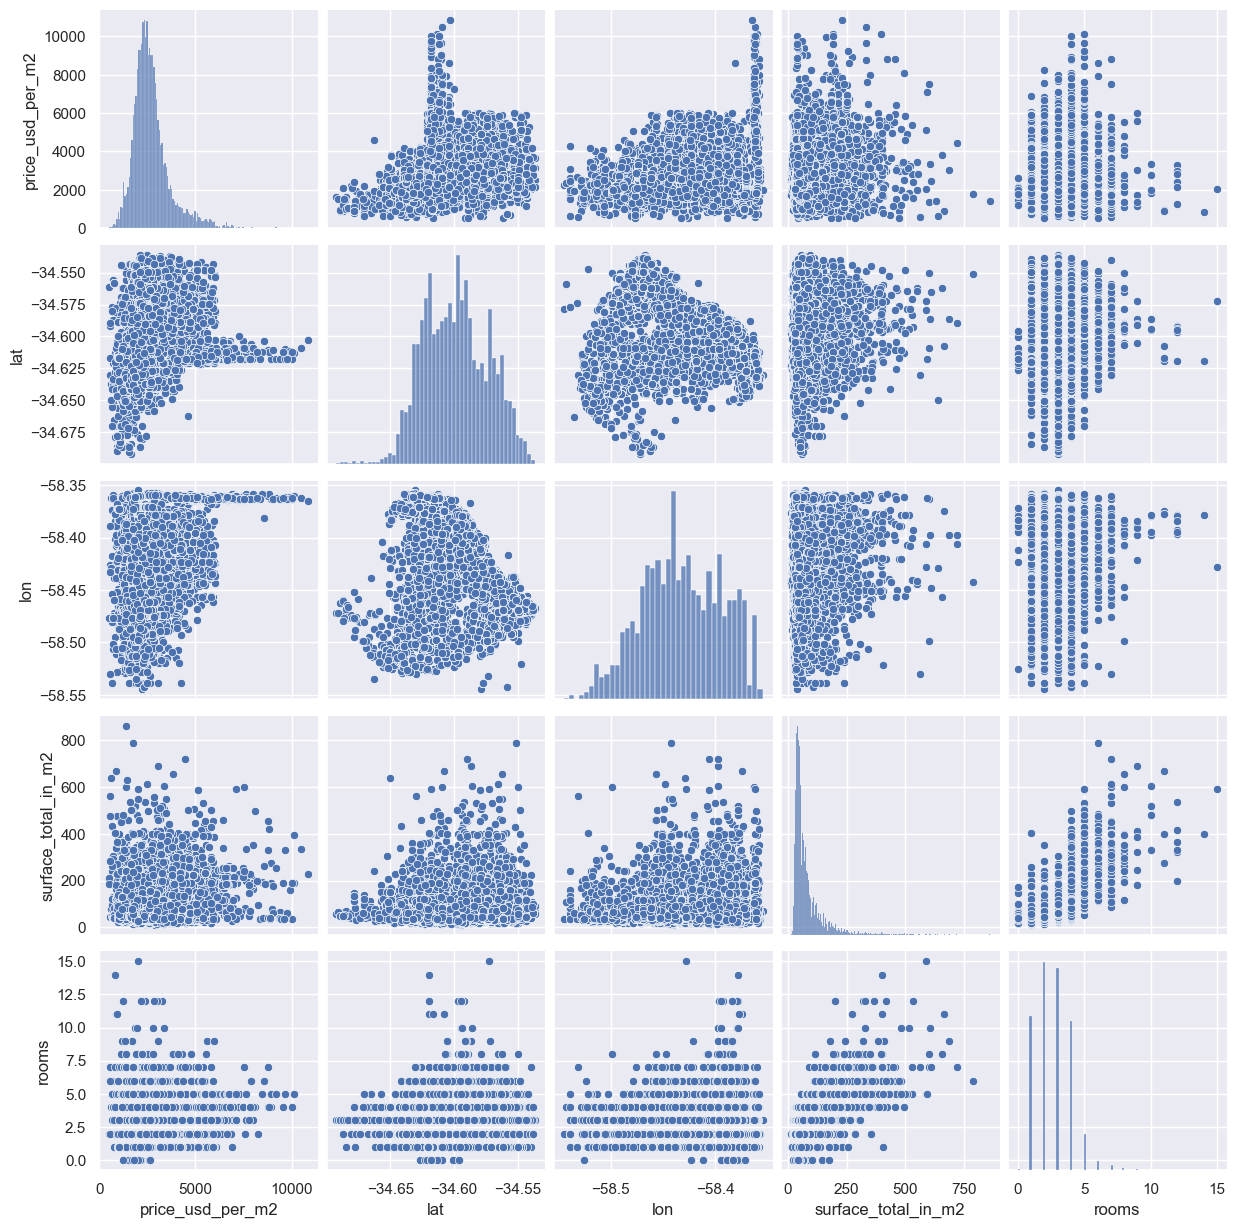

In [155]:
#Repetimos el análisis utilizando el grafico pairplot
sns.pairplot(datos_TP2_filtro);

### Creo un dataframe que solo tenga las variables dummies de los barrios y la columna target y

In [156]:
#Primero le pasamos los valores de los dummies
datos_TP2_barrios=barrios_dummies 

In [157]:
#Agregamos la variable y
datos_TP2_barrios['precio_usd_per_m2']=datos_TP2_filtro['price_usd_per_m2']

## 2.1 Análisis de Variables mediante regresión lineal simple

Probamos la regresión lineal simple con price_usd_per_m2 y otras variables

### 2.1.a Gráfico de Regresión lineal entre superficie total y precio por metro cuadrado

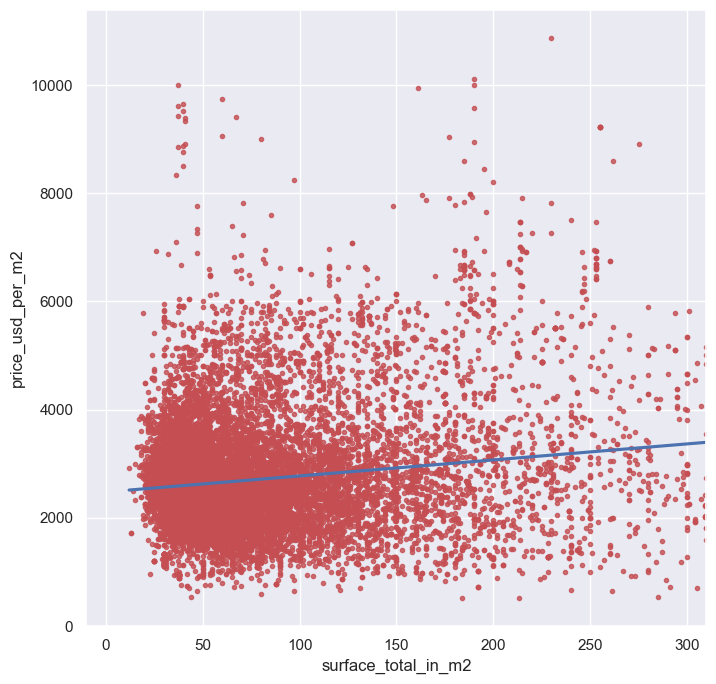

In [158]:
#Modelo para superficie total
sns.regplot(data = datos_TP2, x="surface_total_in_m2", y="price_usd_per_m2", order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(bottom=0);

### 2.1.b Gráfico de Regresión lineal entre latitud y precio por metro cuadrado

<AxesSubplot:xlabel='lon', ylabel='price_usd_per_m2'>

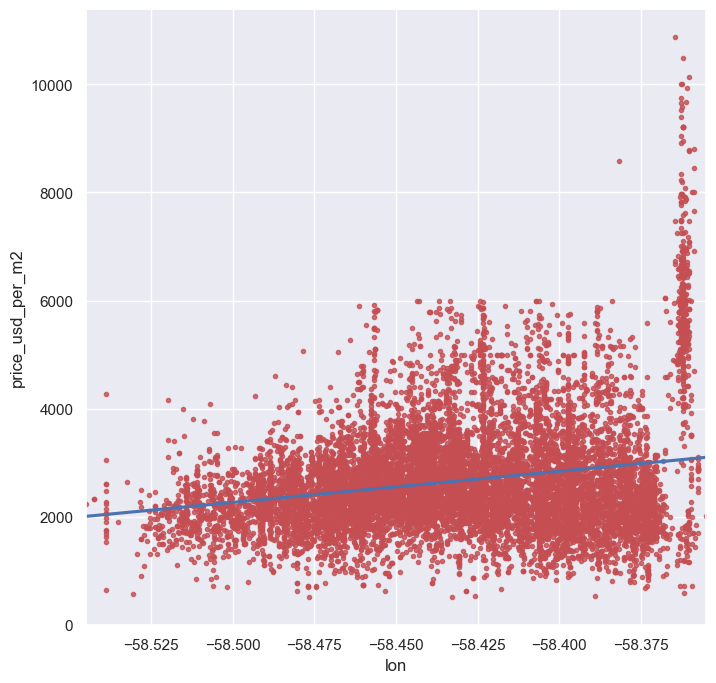

In [159]:
#Modelo para superficie total
sns.regplot(data = datos_TP2, x="lon", y="price_usd_per_m2", order=1, ci=None, scatter_kws={'color':'r', 's':9})
#plt.xlim(-10,310)
#plt.ylim(bottom=0);

### 2.1.c Gráfico de Regresión lineal entre longitud y precio por metro cuadrado

<AxesSubplot:xlabel='lat', ylabel='price_usd_per_m2'>

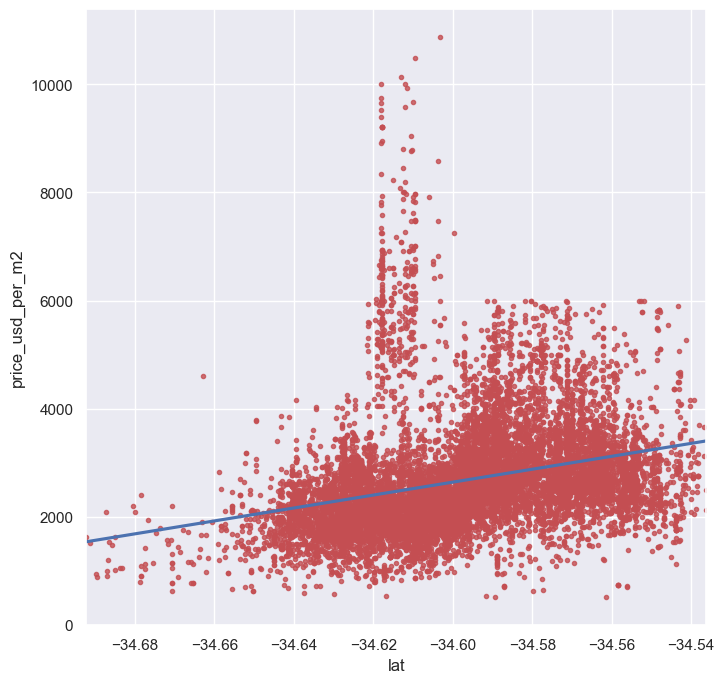

In [160]:
sns.regplot(data = datos_TP2, x="lat", y="price_usd_per_m2", order=1, ci=None, scatter_kws={'color':'r', 's':9})

Ninguna de las tres variables tiene una fuerte lineanidad. Los puntos estan muy dispersos de la recta.

Vemos que hay una latitud y longitud asociadas a precios muchos mas altos. Revisando los mapas, podemos ver que pertenece al barrio de Puerto Madero.

Repetimos el análisis de lat y lon, luego de filtrar el barrio Puerto Madero.

In [161]:
#Que pasa si dropeamos Puero Madero y repetimos el análisis para lon y lat
mask_sin_PM=datos_TP2.loc[datos_TP2_barrios['Puerto Madero']==1]
caba_sin_PM=datos_TP2.drop(mask_sin_PM.index,axis=0)

### 2.1.b* Gráfico de Regresión lineal entre latitud y precio por metro cuadrado ( sin Puerto Madero)

<AxesSubplot:xlabel='lat', ylabel='price_usd_per_m2'>

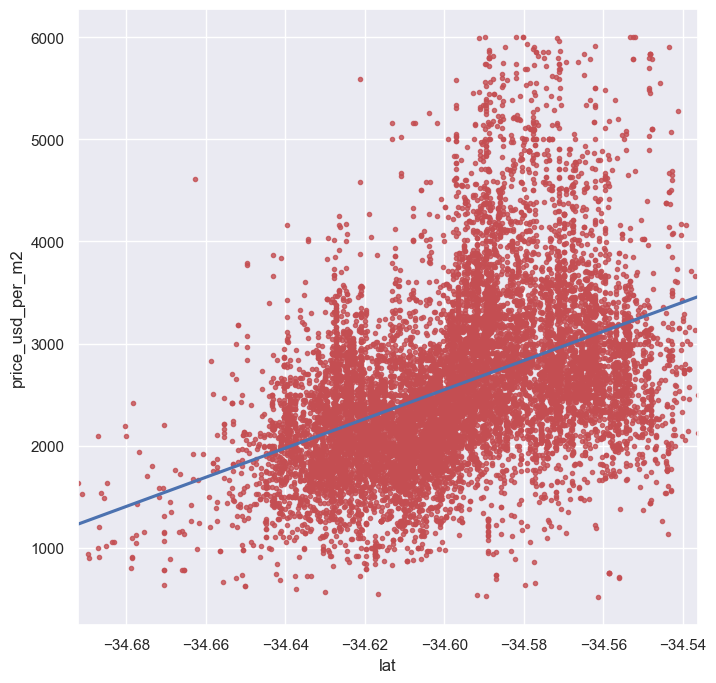

In [162]:
sns.regplot(data = caba_sin_PM, x="lat", y="price_usd_per_m2", order=1, ci=None, scatter_kws={'color':'r', 's':9})

### 2.1.c* Gráfico de Regresión lineal entre longitud y precio por metro cuadrado ( sin Puerto Madero)

<AxesSubplot:xlabel='lon', ylabel='price_usd_per_m2'>

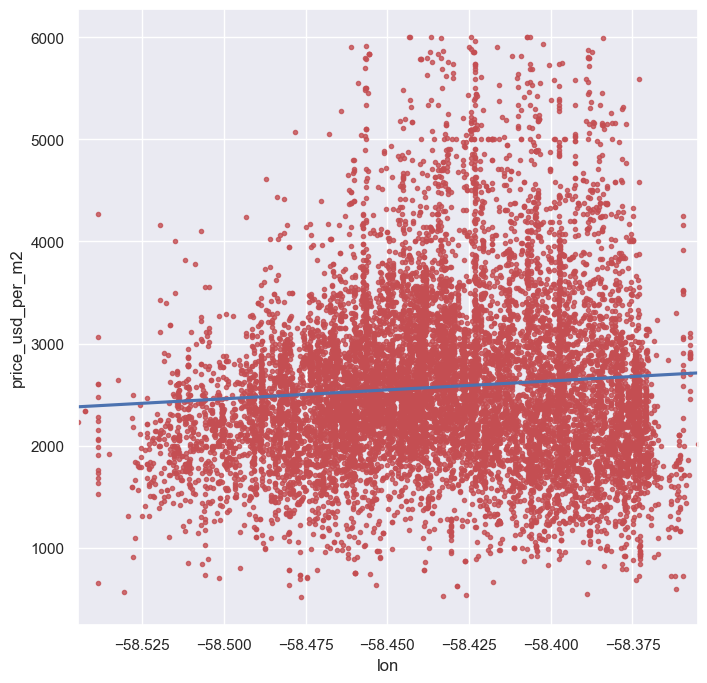

In [163]:
sns.regplot(data = caba_sin_PM, x="lon", y="price_usd_per_m2", order=1, ci=None, scatter_kws={'color':'r', 's':9})

### Aun retirando PM, lat y lon no tiene tanta relación lineal con el precio por metro 2

## 2.2 Análisis de Variables mediante modelos de regresión lineal simple

COmo vamos a implementar modelos de regresión lineal, no puedo tener valores nulos en las features que quiero utilizar

In [164]:
#Filtramos los registros que no tienen valores nulos en latitud (coinciden con los de longitud)
mask_lat_null=caba_sin_PM.loc[caba_sin_PM['lat'].isnull()]
datos_para_lat=caba_sin_PM.drop(mask_lat_null.index,axis =0)

In [193]:
datos_para_lat[['lat','lon']].isnull().sum()

lat    0
lon    0
dtype: int64

### 2.2.1 Modelo de regresión lineal para variable latitud

In [96]:
#Importamos librerias de sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [97]:
#Instancio un modelo para lat
model_lat = LinearRegression(fit_intercept=True)

# Creamos X e y
feature_cols = ['lat']
X = datos_para_lat[feature_cols]
y = datos_para_lat.price_usd_per_m2

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

model_lat.fit(Xtrain, ytrain)

print('El coeficiente del modelo de lat es:',model_lat.coef_)

print('El intercepto del modelo de lat es:',model_lat.intercept_)

ypred = model_lat.predict(Xtest)

print('Los resultados para el modelo de lat son:')
print ('MAE:', mean_absolute_error(ytest, ypred).round(2))
print ('MSE:', mean_squared_error(ytest, ypred).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)).round(2))
print ('R2:', r2_score(ytest, ypred).round(2))

NameError: name 'datos_para_lat' is not defined

El resultado fue un R2 de 0.21 lo cual es muy bajo como variable predictora.

### 2.2.2 Modelo de regresión lineal para variables latitud y longitud juntas 

In [176]:
#Separos los datos de lat y lon y me quedo con aquellos que no tiene nulos
mask_lat_null=caba_sin_PM.loc[caba_sin_PM['lat'].isnull()]
mask_lon_null=caba_sin_PM.loc[caba_sin_PM['lon'].isnull()]

datos_para_lat_lon=caba_sin_PM.drop(mask_lat_null.index,axis =0)

In [95]:
# Instancio el modelo.
model_lat_lon = linear_model.LinearRegression()

X = datos_para_lat_lon[["lat", "lon"]]
y = datos_para_lat_lon["price_usd_per_m2"]

# Fiteo el modelo y hago las predicciones.
model = model_lat_lon.fit(X, y)
predictions = model.predict(X)

# Graficamos el modelo
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10,alpha=0.1)
plt.xlabel("Predicciones de price_usd_per_m2 usando lat y lon")
plt.ylabel("Valores reales Price_usd-per_m2")
plt.show()
print ("EMC:", mean_squared_error(y, predictions))
prevMSE = mean_squared_error(y, predictions)

NameError: name 'linear_model' is not defined

In [178]:
# Generamos una función que resume los coeficientes, el intercepto y el R2
# "model" = objeto con el modelo
# "X" = matrix de variables independientes

def sum_mod(model, X):
    a = pd.DataFrame(model.coef_ , X.columns.values)
    a = a.append(pd.DataFrame([model.intercept_, model.score(X, y)], index=['Intecept','R2']))
    return(a)

In [179]:
sum_mod(model_lat_lon, X)

0
lat        15175.625539
lon         3526.545062
Intecept  733691.318948
R2             0.223964

El R2 mejoro pero es casi despreciable la diferencia de 0,01.

### 2.2.3 Modelo de regresión lineal para variables latitud, longitud y superficie total juntas 

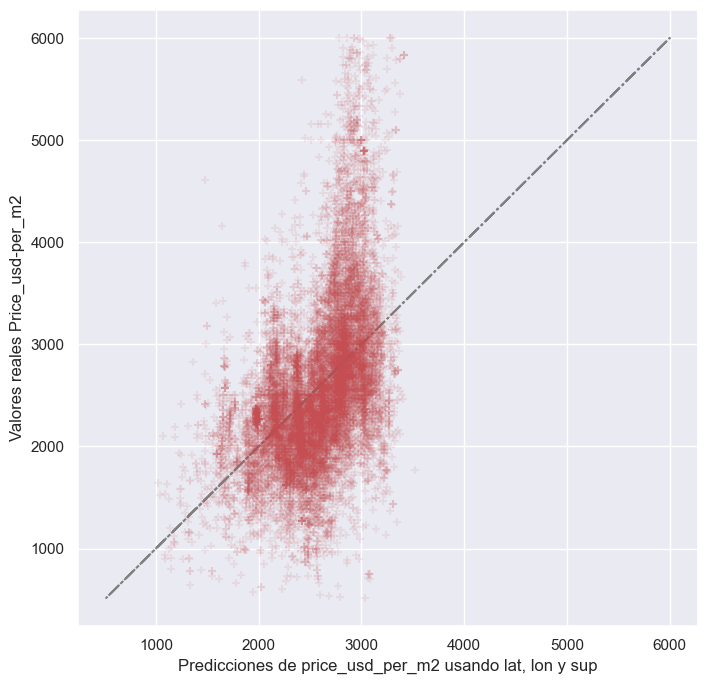

EMC: 500001.7826835194


In [206]:
# Instancio el modelo.
model_lat_lon_sup = linear_model.LinearRegression()

#Usamos los datos filtrados para lat y lon, ya que la columna de superficie no tiene nulos
X = datos_para_lat_lon[["lat", "lon","surface_total_in_m2"]]
y = datos_para_lat_lon["price_usd_per_m2"]

# Fiteo el modelo y hago las predicciones.
model = model_lat_lon_sup.fit(X, y)
predictions = model.predict(X)

# Graficamos el modelo
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10,alpha=0.1)
plt.xlabel("Predicciones de price_usd_per_m2 usando lat, lon y sup")
plt.ylabel("Valores reales Price_usd-per_m2")
plt.show()
print ("EMC:", mean_squared_error(y, predictions))


# Mismo analisis con stats model

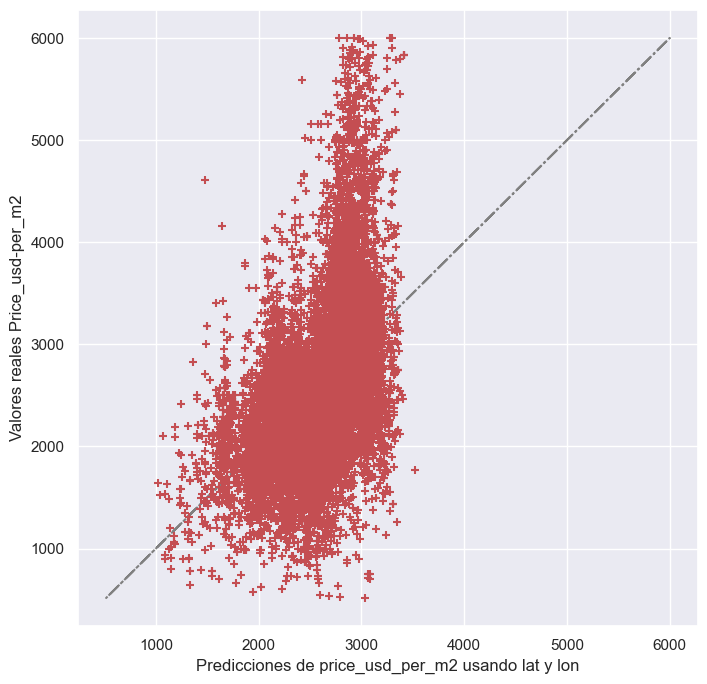

EMC: 500001.7826835194


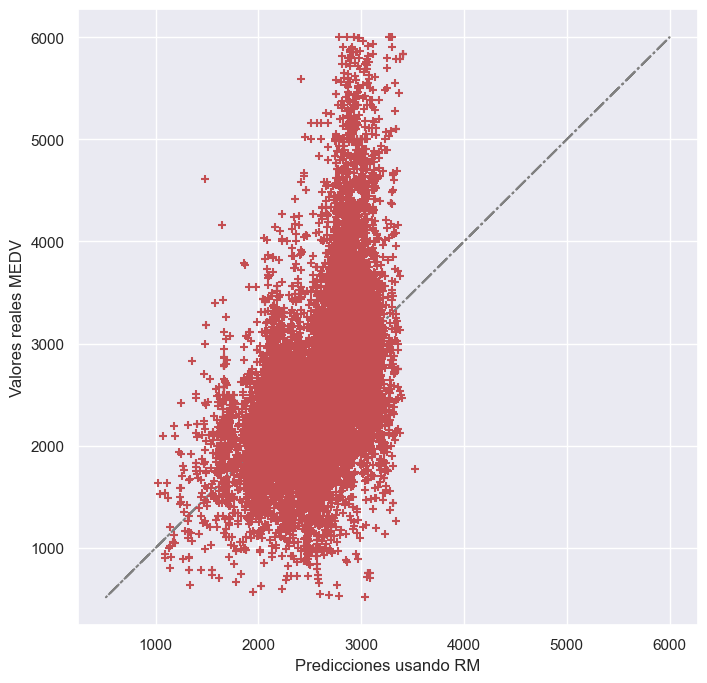

EMC: 500001.782683519
                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     1331.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:12:11   Log-Likelihood:            -1.0988e+05
No. Observations:               13769   AIC:                         2.198e+05
Df Residuals:                   13765   BIC:                         2.198e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const       

In [181]:
# Importamos la api.
import statsmodels.api as sm

# De manera análoga a la vista en el primer ejercicio, definimos el vector de variables con la primer variable RM.
# Instancio el modelo.
#model_lat_lon = linear_model.LinearRegression()

X = datos_para_lat_lon[["lat", "lon","surface_total_in_m2"]]
y = datos_para_lat_lon["price_usd_per_m2"]

# Fiteo el modelo y hago las predicciones.
model = model_lat_lon.fit(X, y)
predictions = model.predict(X)

# Graficamos el modelo
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de price_usd_per_m2 usando lat y lon")
plt.ylabel("Valores reales Price_usd-per_m2")
plt.show()
print ("EMC:", mean_squared_error(y, predictions))
prevMSE = mean_squared_error(y, predictions)
# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Graficamos los resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())

# Modelo utilizando las variables Dummies de Barrios

In [182]:
# Tomos los datos de precio por m2 y solo los barrios
datos_TP2_barrios.head()

Abasto  Agronomía  Almagro  Balvanera  Barracas  Barrio Norte  Belgrano  \
0  0       0          0        0          0         0             0         0   
2  0       0          0        0          0         0             0         0   
3  0       0          0        0          0         0             0         0   
7  0       0          0        0          0         0             0         1   
8  0       0          0        0          0         0             0         1   

   Boca  Boedo  ...  Villa Luro  Villa Ortuzar  Villa Pueyrredón  Villa Real  \
0     0      0  ...           0              0                 0           0   
2     0      0  ...           0              0                 0           0   
3     0      0  ...           0              0                 0           0   
7     0      0  ...           0              0                 0           0   
8     0      0  ...           0              0                 0           0   

   Villa Riachuelo  Villa Santa Rita  Villa Soldati  Villa Urquiza  \
0                0                 0              0              0   
2                0                 0              0              0   
3                0                 0              0              0   
7                0                 0              0              0   
8                0                 0              0              0   

   Villa del Parque  precio_usd_per_m2  
0                 0                NaN  
2                 0        1309.090909  
3                 0                NaN  
7                 0        3066.666667  
8                 0        3000.000000  

[5 rows x 59 columns]

In [183]:
datos_TP2_barrios=datos_TP2_barrios.drop('',axis=1)

In [184]:
#Eliminamos un variable para tener k-1 variables dummies
datos_TP2_barrios=datos_TP2_barrios.drop('Abasto',axis=1)

In [185]:
datos_TP2_barrios.head()

Agronomía  Almagro  Balvanera  Barracas  Barrio Norte  Belgrano  Boca  \
0          0        0          0         0             0         0     0   
2          0        0          0         0             0         0     0   
3          0        0          0         0             0         0     0   
7          0        0          0         0             0         1     0   
8          0        0          0         0             0         1     0   

   Boedo  Caballito  Catalinas  ...  Villa Luro  Villa Ortuzar  \
0      0          0          0  ...           0              0   
2      0          0          0  ...           0              0   
3      0          0          0  ...           0              0   
7      0          0          0  ...           0              0   
8      0          0          0  ...           0              0   

   Villa Pueyrredón  Villa Real  Villa Riachuelo  Villa Santa Rita  \
0                 0           0                0                 0   
2                 0           0                0                 0   
3                 0           0                0                 0   
7                 0           0                0                 0   
8                 0           0                0                 0   

   Villa Soldati  Villa Urquiza  Villa del Parque  precio_usd_per_m2  
0              0              0                 0                NaN  
2              0              0                 0        1309.090909  
3              0              0                 0                NaN  
7              0              0                 0        3066.666667  
8              0              0                 0        3000.000000  

[5 rows x 57 columns]

In [186]:
#Elimino los NaN de price_usd_per_m2
Nulos_barrios = datos_TP2_barrios['precio_usd_per_m2'].isnull()
listaNulos_barrios = datos_TP2_barrios[Nulos_barrios].index
datos_TP2_barrios = datos_TP2_barrios.drop(listaNulos_barrios, axis=0)

In [187]:
datos_TP2_barrios['precio_usd_per_m2'].isnull().sum()

0

In [188]:
feature_barrios=datos_TP2_barrios.columns

In [189]:
feature_barrios=feature_barrios.drop('precio_usd_per_m2')

In [190]:
# Incluímos variables dummies

feature_cols = feature_barrios
X = datos_TP2_barrios[feature_cols]
y = datos_TP2_barrios.precio_usd_per_m2
linreg = LinearRegression()
linreg.fit(X, y)


list(zip(feature_cols, linreg.coef_))

[('Agronomía', -8.214092003342726),
 ('Almagro', -32.10016448942224),
 ('Balvanera', -325.5282378895334),
 ('Barracas', -208.9711179981318),
 ('Barrio Norte', 724.1789726152713),
 ('Belgrano', 827.7126492562707),
 ('Boca', -569.9642071681111),
 ('Boedo', -186.71386423660726),
 ('Caballito', 192.9065468389449),
 ('Catalinas', -447.0535159041276),
 ('Centro / Microcentro', 36.829791140521195),
 ('Chacarita', -57.56980861946073),
 ('Coghlan', 268.53081588074207),
 ('Colegiales', 355.4630441827975),
 ('Congreso', -406.7939471189732),
 ('Constitución', -419.1915494675383),
 ('Flores', -196.97295258527834),
 ('Floresta', -366.8928442972797),
 ('Las Cañitas', 1165.0362778960175),
 ('Liniers', -296.7675059942483),
 ('Mataderos', -392.260937760438),
 ('Monserrat', -145.6714077029227),
 ('Monte Castro', -235.51565536344395),
 ('Nuñez', 779.73076813832),
 ('Once', -402.8144984739488),
 ('Palermo', 991.2229909760354),
 ('Parque Avellaneda', -526.2775292185015),
 ('Parque Centenario', 3.86621284247

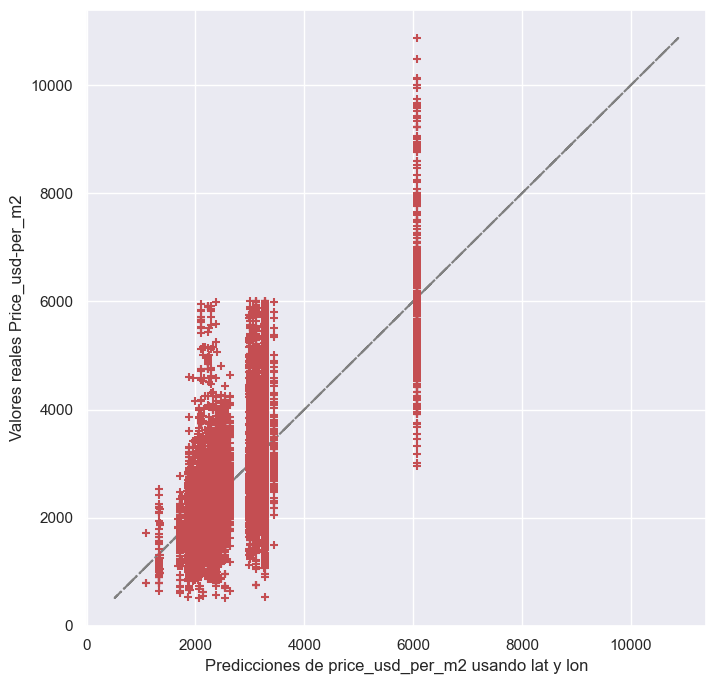

EMC: 494742.8963637438


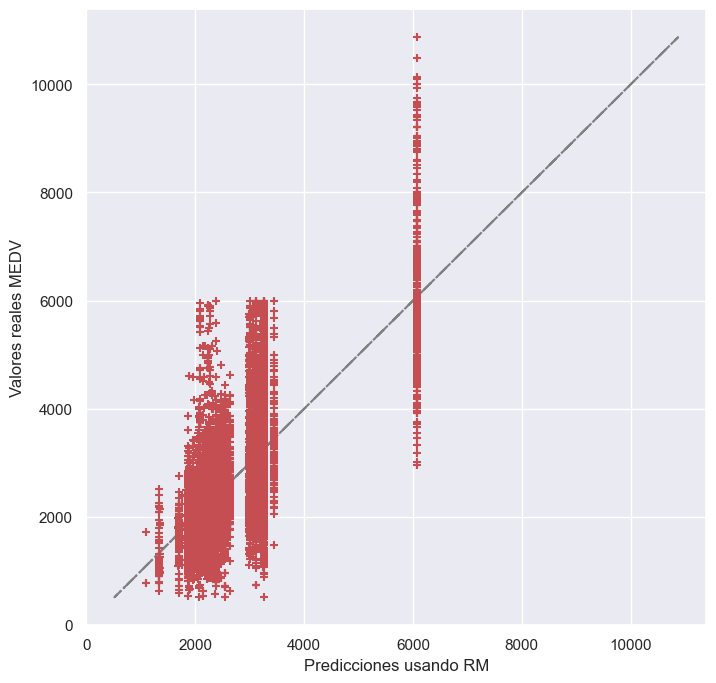

EMC: 494742.8963637439
                            OLS Regression Results                            
Dep. Variable:      precio_usd_per_m2   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     360.4
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:12:14   Log-Likelihood:            -1.5138e+05
No. Observations:               18982   AIC:                         3.029e+05
Df Residuals:                   18926   BIC:                         3.033e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const    

In [191]:
# Importamos la api.
import statsmodels.api as sm

# De manera análoga a la vista en el primer ejercicio, definimos el vector de variables con la primer variable RM.
# Instancio el modelo.
model_barrios = linear_model.LinearRegression()

feature_cols = feature_barrios
X = datos_TP2_barrios[feature_cols]
y = datos_TP2_barrios.precio_usd_per_m2


# Fiteo el modelo y hago las predicciones.
model = model_barrios.fit(X, y)
predictions = model.predict(X)

# Graficamos el modelo
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de price_usd_per_m2 usando lat y lon")
plt.ylabel("Valores reales Price_usd-per_m2")
plt.show()
print ("EMC:", mean_squared_error(y, predictions))
prevMSE = mean_squared_error(y, predictions)
# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Graficamos los resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())

Ahora barrios mas superficie total

In [201]:
datos_TP2_barrios_sup=datos_TP2_barrios

In [203]:
datos_TP2_barrios_sup['surface_total_in_m2']=datos_TP2['surface_total_in_m2']

In [204]:
feature_barrios_sup=datos_TP2_barrios_sup.columns

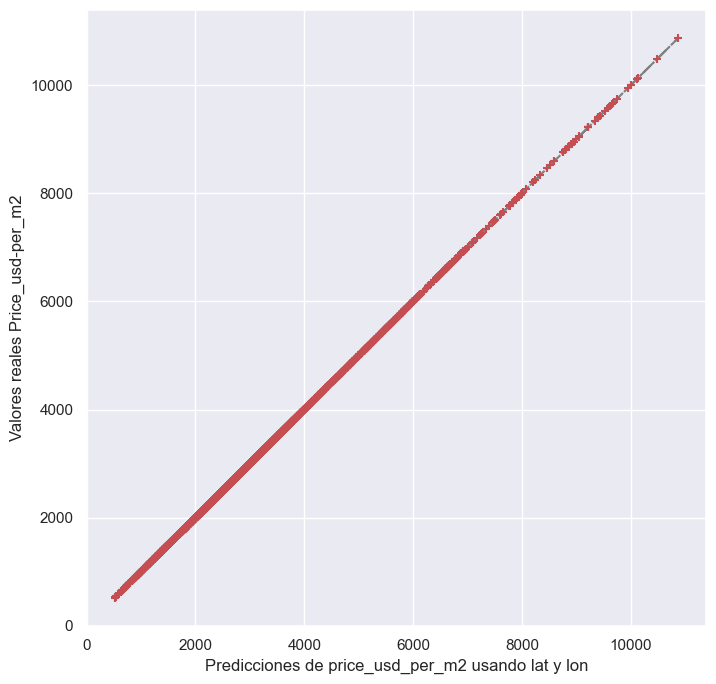

EMC: 1.965770028407849e-25


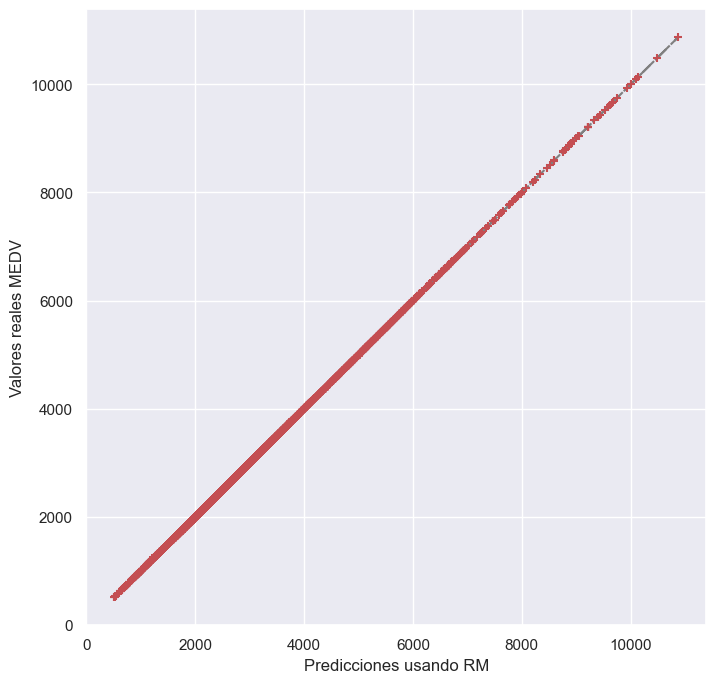

EMC: 7.65486754705446e-23
                            OLS Regression Results                            
Dep. Variable:      precio_usd_per_m2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.393e+30
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:10:17   Log-Likelihood:             4.5639e+05
No. Observations:               18982   AIC:                        -9.127e+05
Df Residuals:                   18924   BIC:                        -9.122e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const 

In [207]:
# Importamos la api.
import statsmodels.api as sm


# De manera análoga a la vista en el primer ejercicio, definimos el vector de variables con la primer variable RM.
# Instancio el modelo.
model_barrios_sup = linear_model.LinearRegression()

feature_cols = feature_barrios_sup


#feature_cols=feature_barrios.append(datos_TP2['surface_total_in_m2'])

X = datos_TP2_barrios[feature_cols]
y = datos_TP2_barrios.precio_usd_per_m2


# Fiteo el modelo y hago las predicciones.
model = model_barrios_sup.fit(X, y)
predictions = model.predict(X)

# Graficamos el modelo
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de price_usd_per_m2 usando lat y lon")
plt.ylabel("Valores reales Price_usd-per_m2")
plt.show()
print ("EMC:", mean_squared_error(y, predictions))
prevMSE = mean_squared_error(y, predictions)
# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Graficamos los resultados
plt.plot(y,y, '-.', c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y, predictions))
print (model.summary())